In [1]:
# Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('C:/Users/criju/Documents/Codigos Tesis/data/serie.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head(5)

Fecha  Frecuencia
0 2020-03-12         2.0
1 2020-03-13         1.0
2 2020-03-14         1.0
3 2020-03-15         1.0
4 2020-03-16         0.0

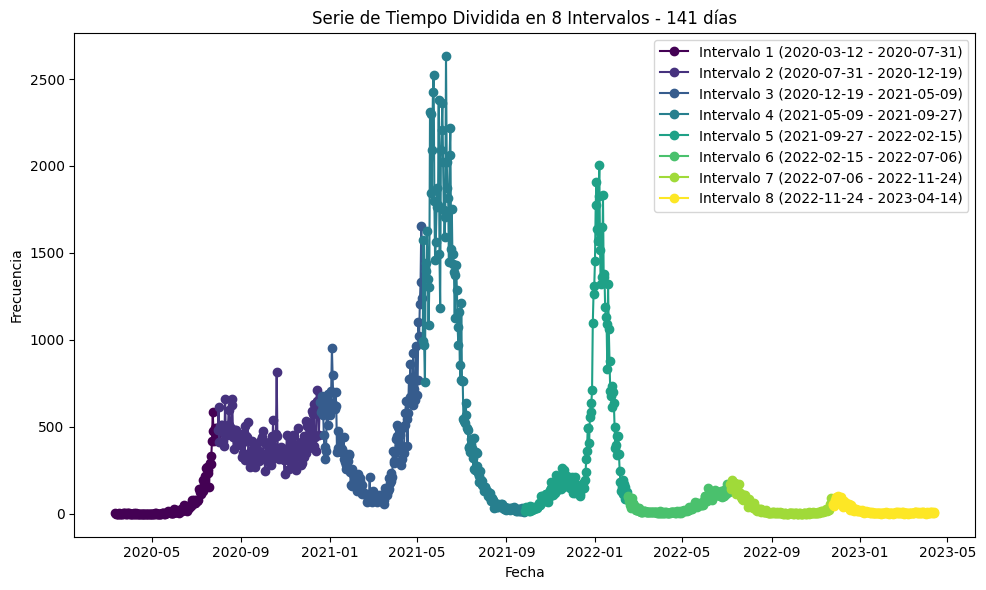

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Determinar el rango de fechas
fecha_min = df['Fecha'].min()
fecha_max = df['Fecha'].max()

# Crear 9 límites para obtener 8 intervalos regulares
bins = pd.date_range(start=fecha_min, end=fecha_max, periods=9)

# Asignar cada fecha a un intervalo
df['Intervalo'] = pd.cut(df['Fecha'], bins=bins, include_lowest=True, right=False)

# Preparar la figura para graficar
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener 8 colores de un colormap, por ejemplo 'viridis'
colores = plt.cm.viridis(np.linspace(0, 1, 8))

# Iterar sobre cada intervalo y graficar los datos
intervalos_ordenados = sorted(df['Intervalo'].dropna().unique(), key=lambda x: x.left)
for i, intervalo in enumerate(intervalos_ordenados):
    datos_intervalo = df[df['Intervalo'] == intervalo]
    
    # Calcular la cantidad de días en el intervalo
    dias_intervalo = (intervalo.right - intervalo.left).days
    
    # Graficar
    ax.plot(datos_intervalo['Fecha'], datos_intervalo['Frecuencia'],
            label=f'Intervalo {i+1} ({intervalo.left.date()} - {intervalo.right.date()})',
            color=colores[i], marker='o')

# Configuración de ejes y leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia')
ax.set_title(f'Serie de Tiempo Dividida en 8 Intervalos - {dias_intervalo} días')
ax.legend()
plt.tight_layout()
plt.show()


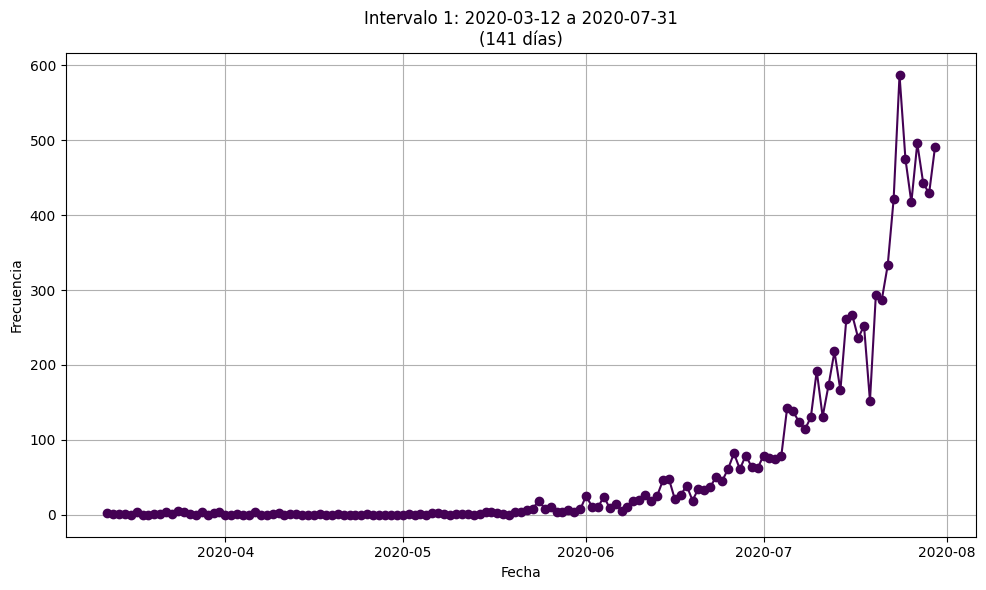

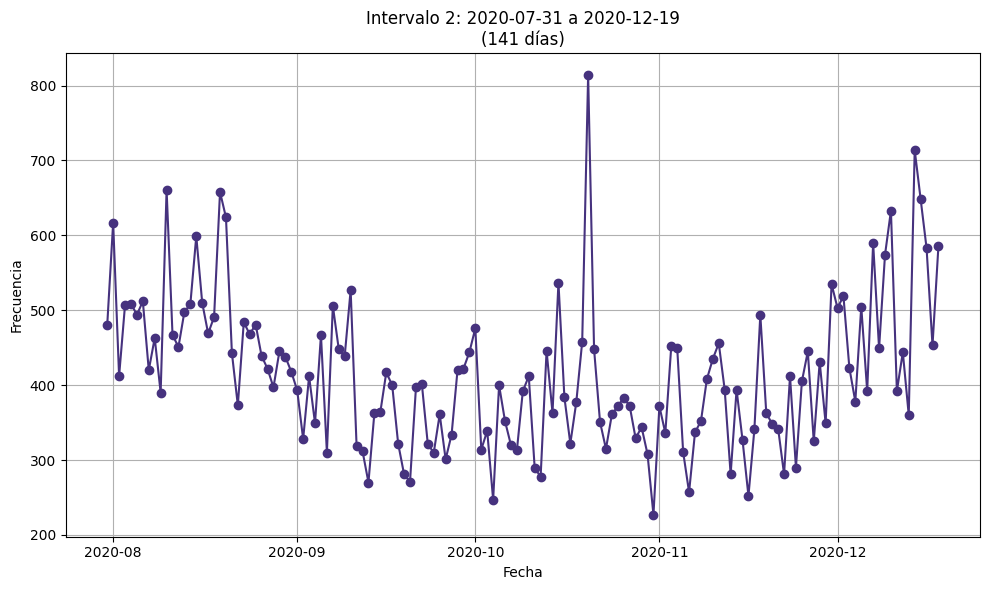

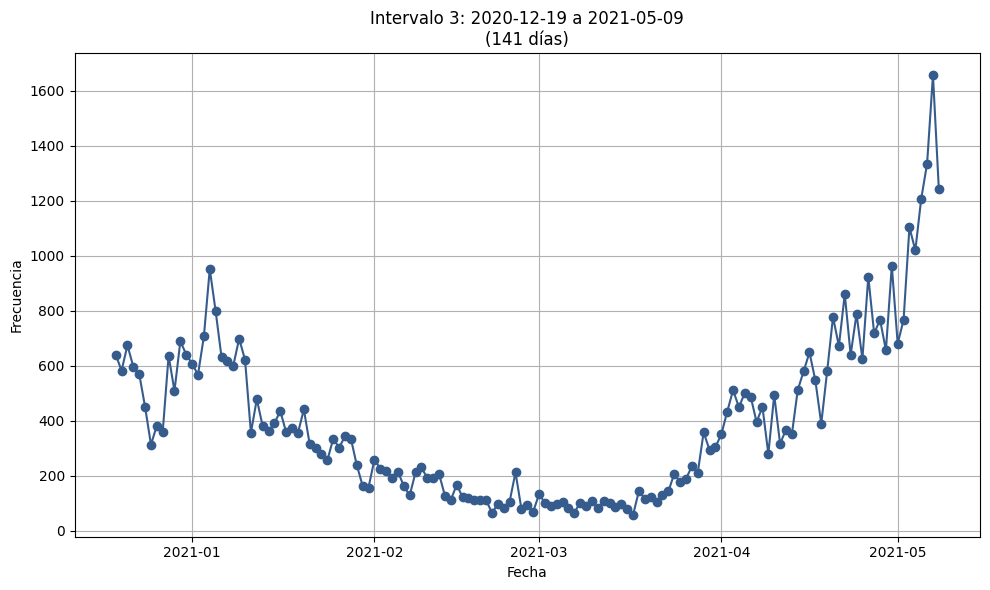

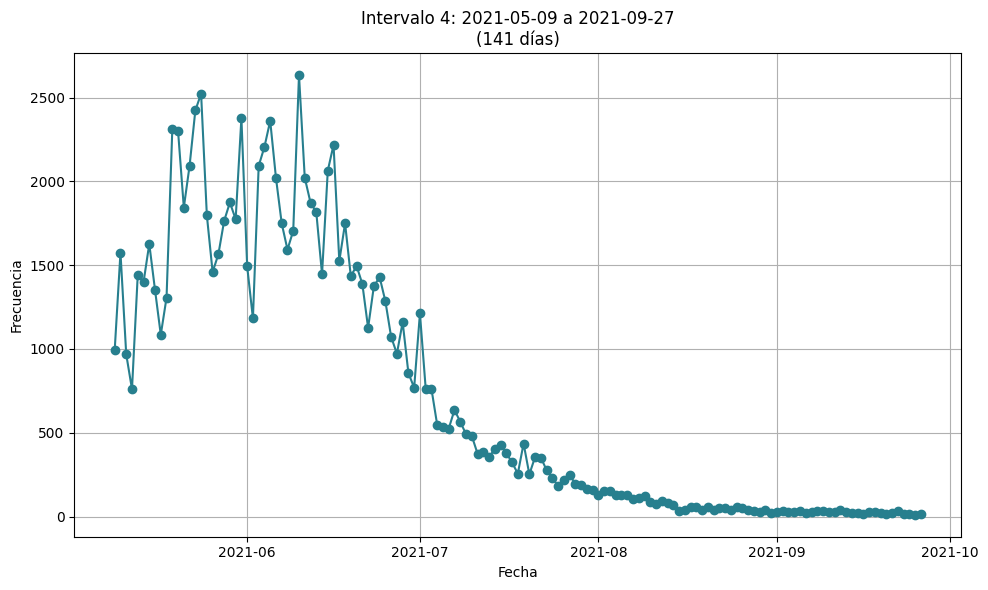

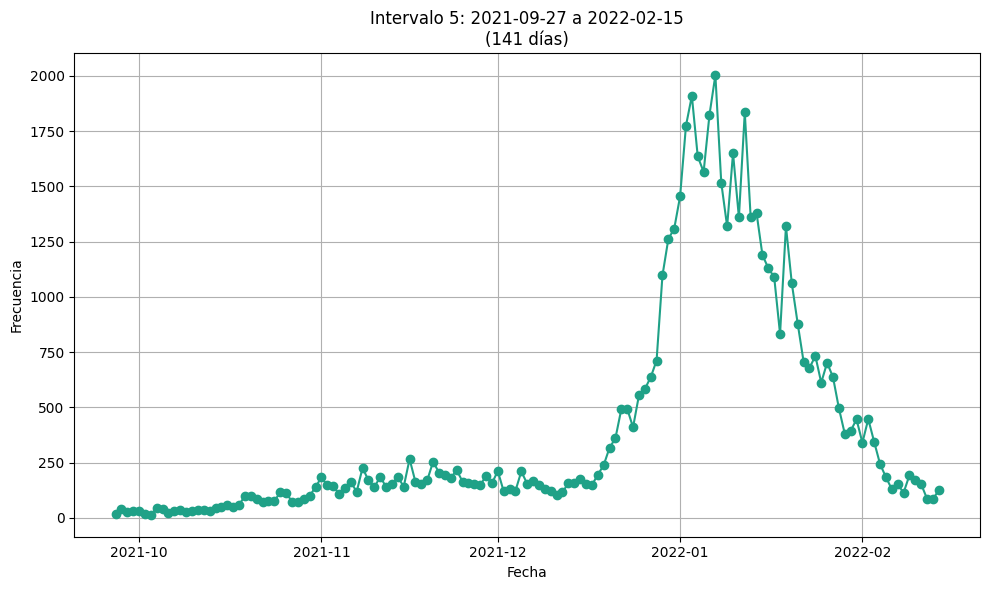

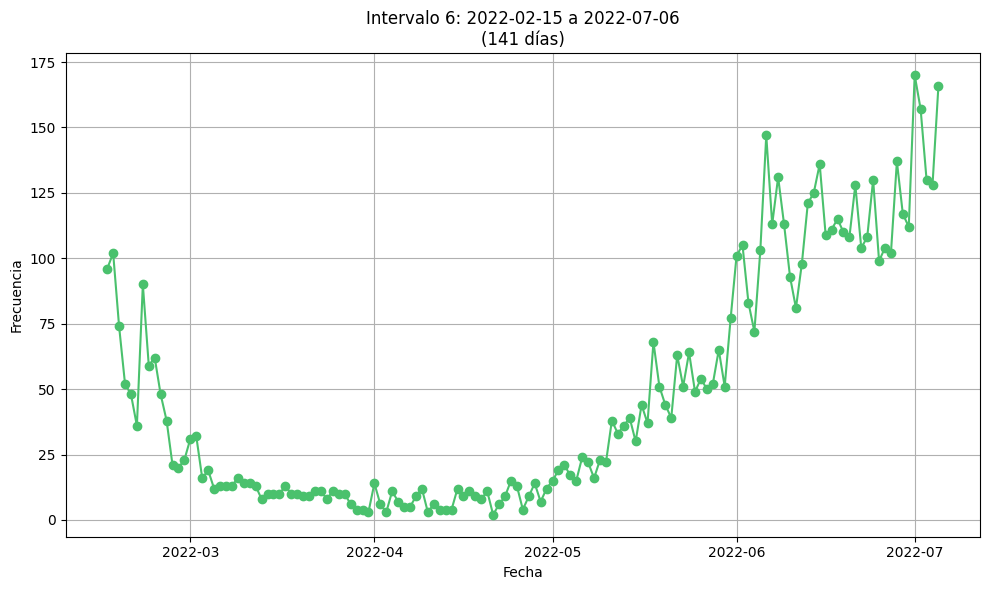

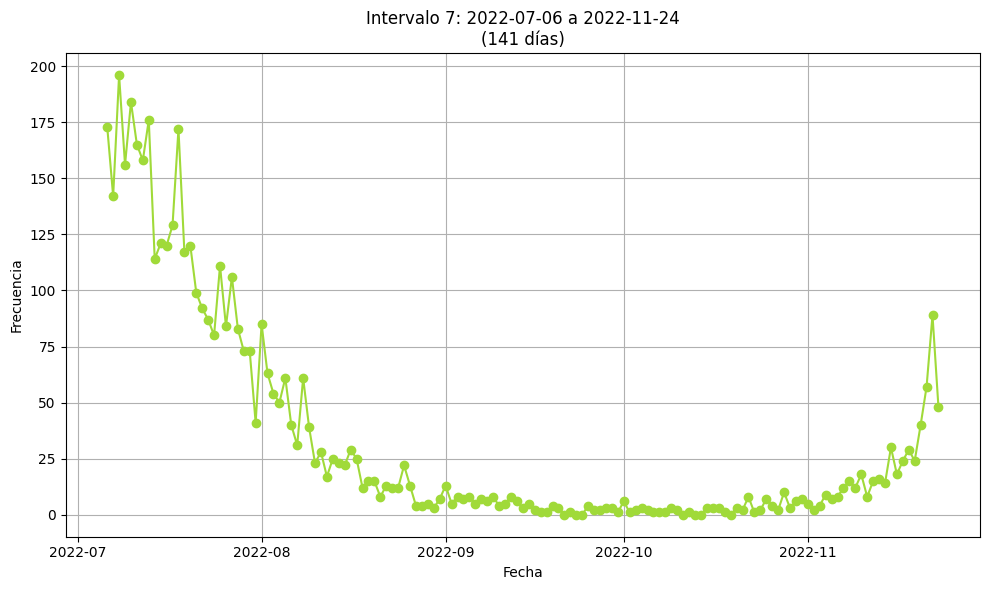

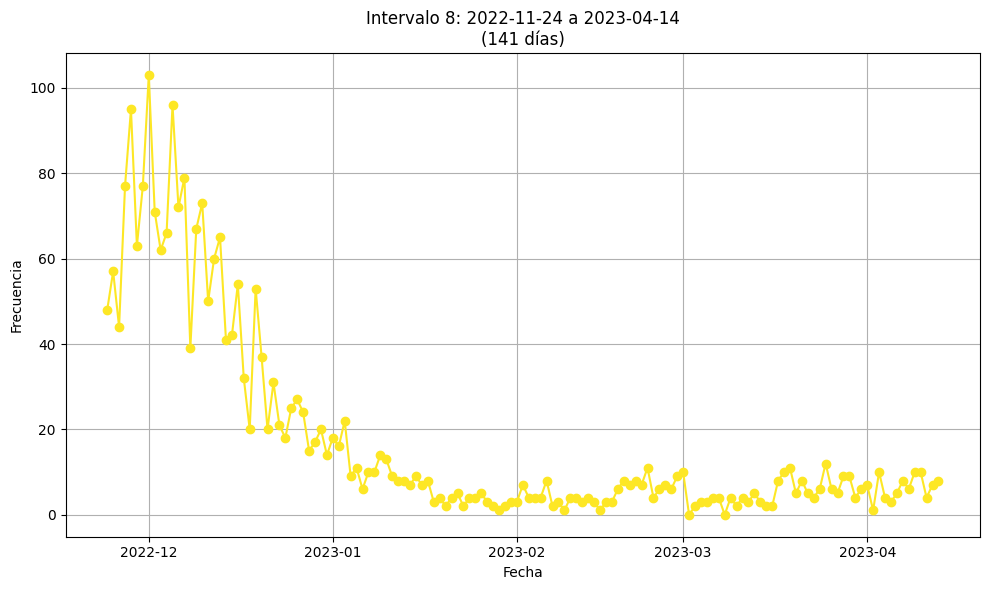

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configuración inicial (generación de intervalos)
fecha_min = df['Fecha'].min()
fecha_max = df['Fecha'].max()
bins = pd.date_range(start=fecha_min, end=fecha_max, periods=9)
df['Intervalo'] = pd.cut(df['Fecha'], bins=bins, include_lowest=True, right=False)

# Colores para cada intervalo
colores = plt.cm.viridis(np.linspace(0, 1, 8))
intervalos_ordenados = sorted(df['Intervalo'].dropna().unique(), key=lambda x: x.left)

# Bucle para graficar cada intervalo por separado
for i, intervalo in enumerate(intervalos_ordenados):
    datos_intervalo = df[df['Intervalo'] == intervalo]
    dias_intervalo = (intervalo.right - intervalo.left).days  # Días del intervalo actual
    
    # Crear una nueva figura para cada intervalo
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(datos_intervalo['Fecha'], datos_intervalo['Frecuencia'], 
            color=colores[i], marker='o', linestyle='-')
    
    # Configuración de cada figura
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Intervalo {i+1}: {intervalo.left.date()} a {intervalo.right.date()}\n({dias_intervalo} días)')
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar o guardar la figura
    plt.show()  # Para mostrar en pantalla
    # plt.savefig(f'intervalo_{i+1}.png')  # Para guardar en archivo
    # plt.close()  # Cierra la figura para liberar memoria

### Modelos ventana de 7 días 


--------------------------------------------------
Entrenamiento excluyendo intervalo 1
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


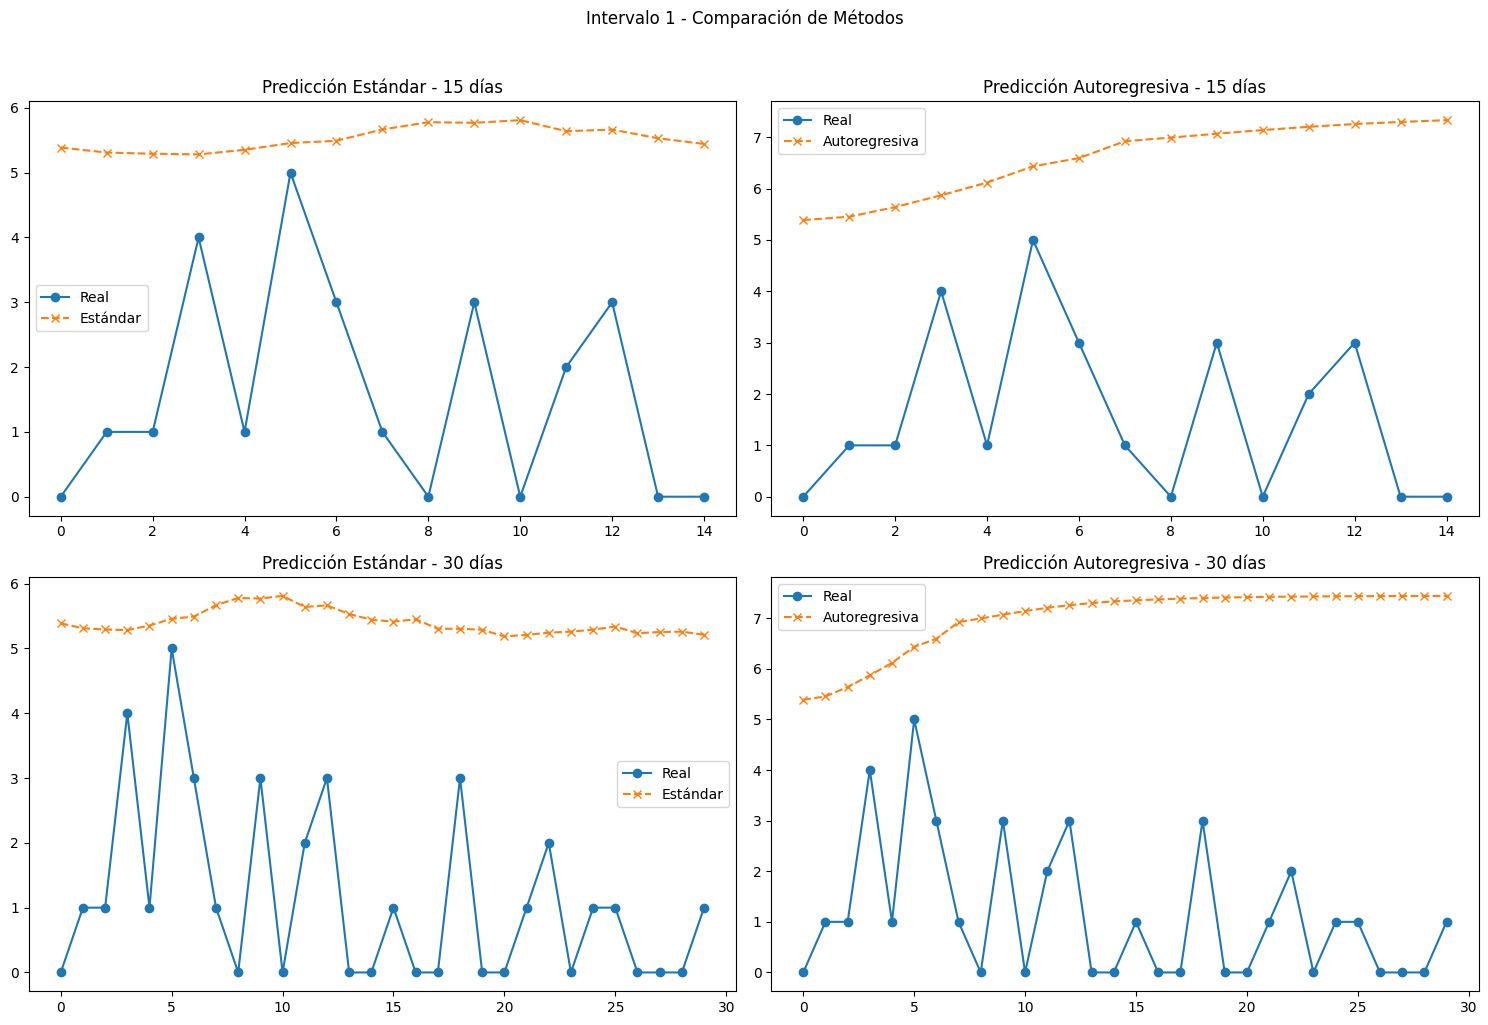


--------------------------------------------------
Entrenamiento excluyendo intervalo 2
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


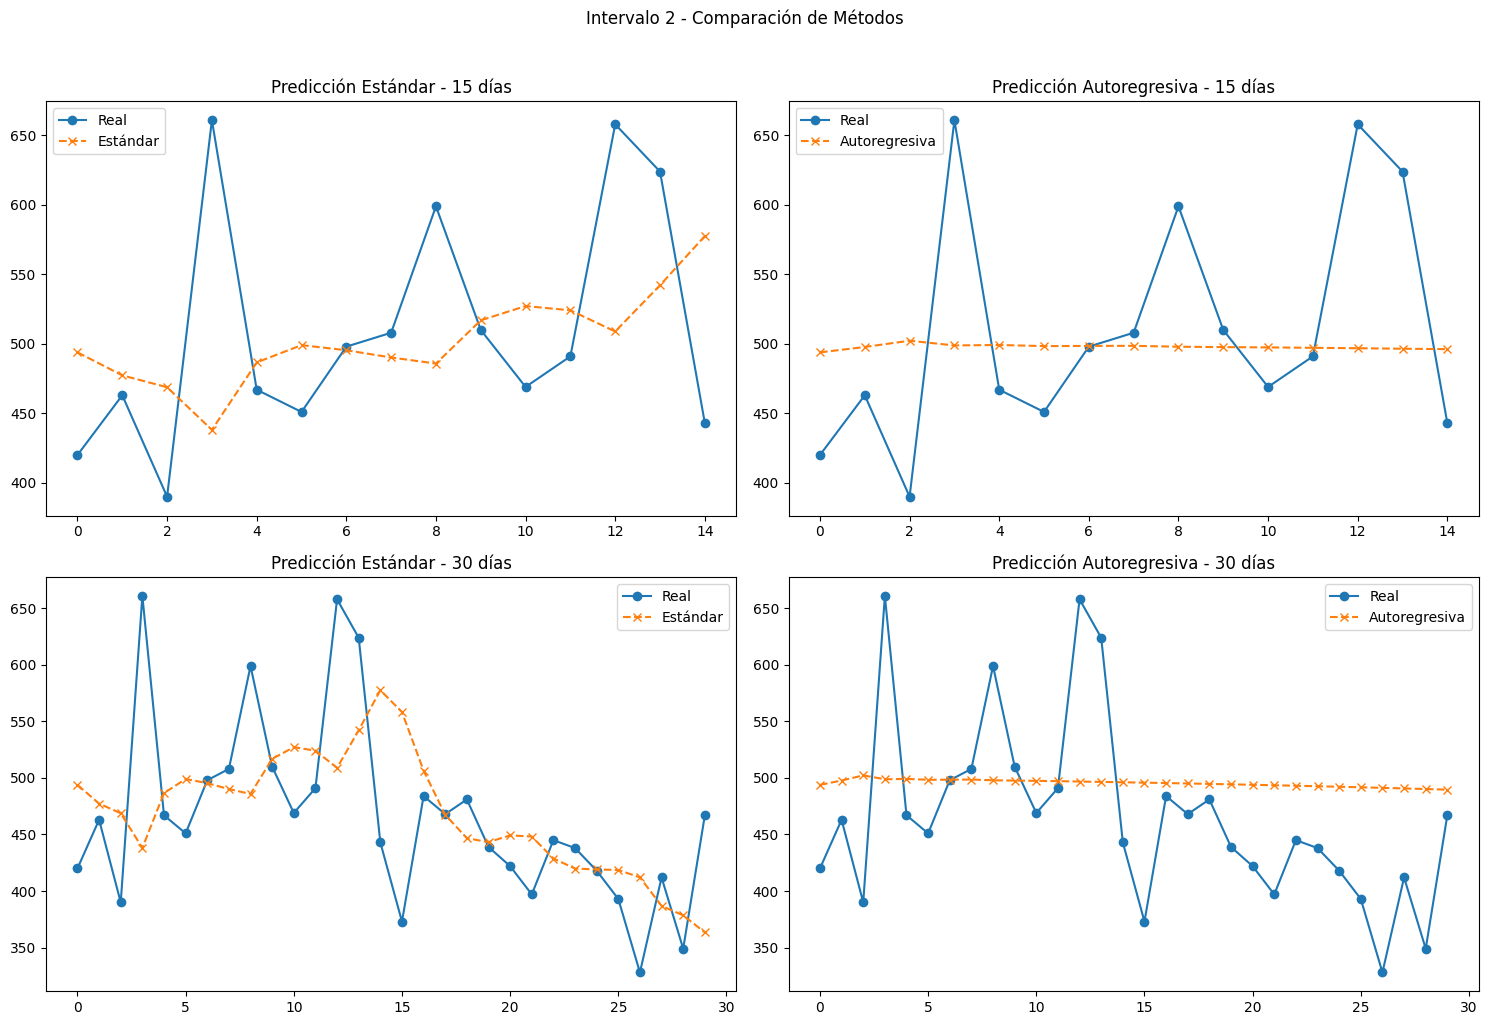


--------------------------------------------------
Entrenamiento excluyendo intervalo 3
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


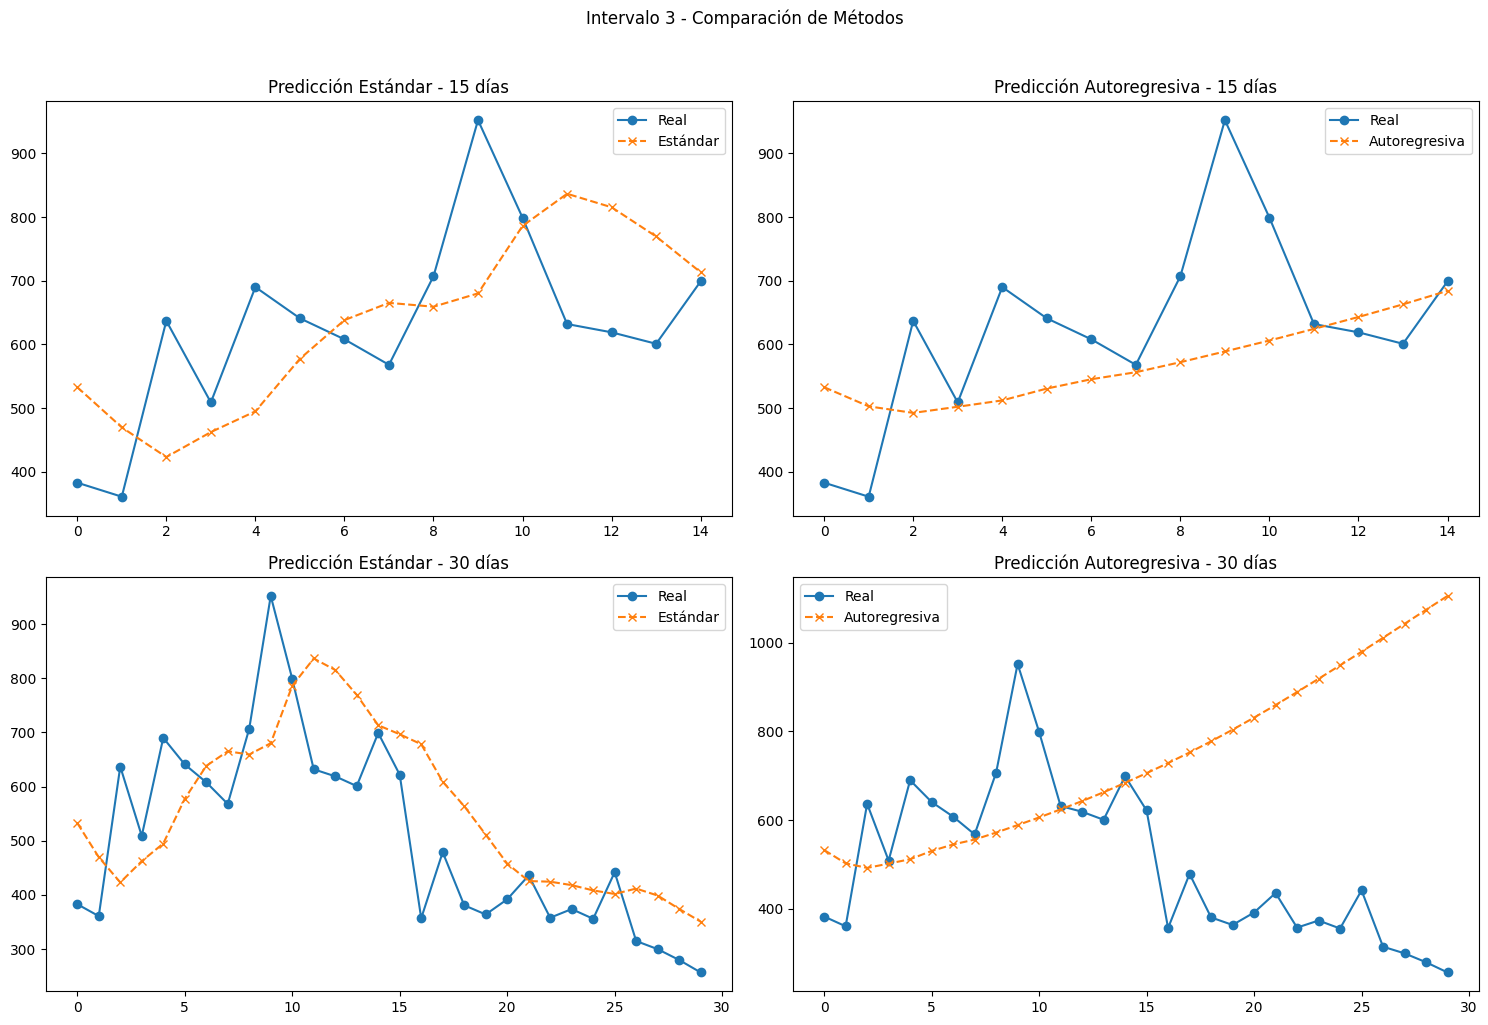


--------------------------------------------------
Entrenamiento excluyendo intervalo 4
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


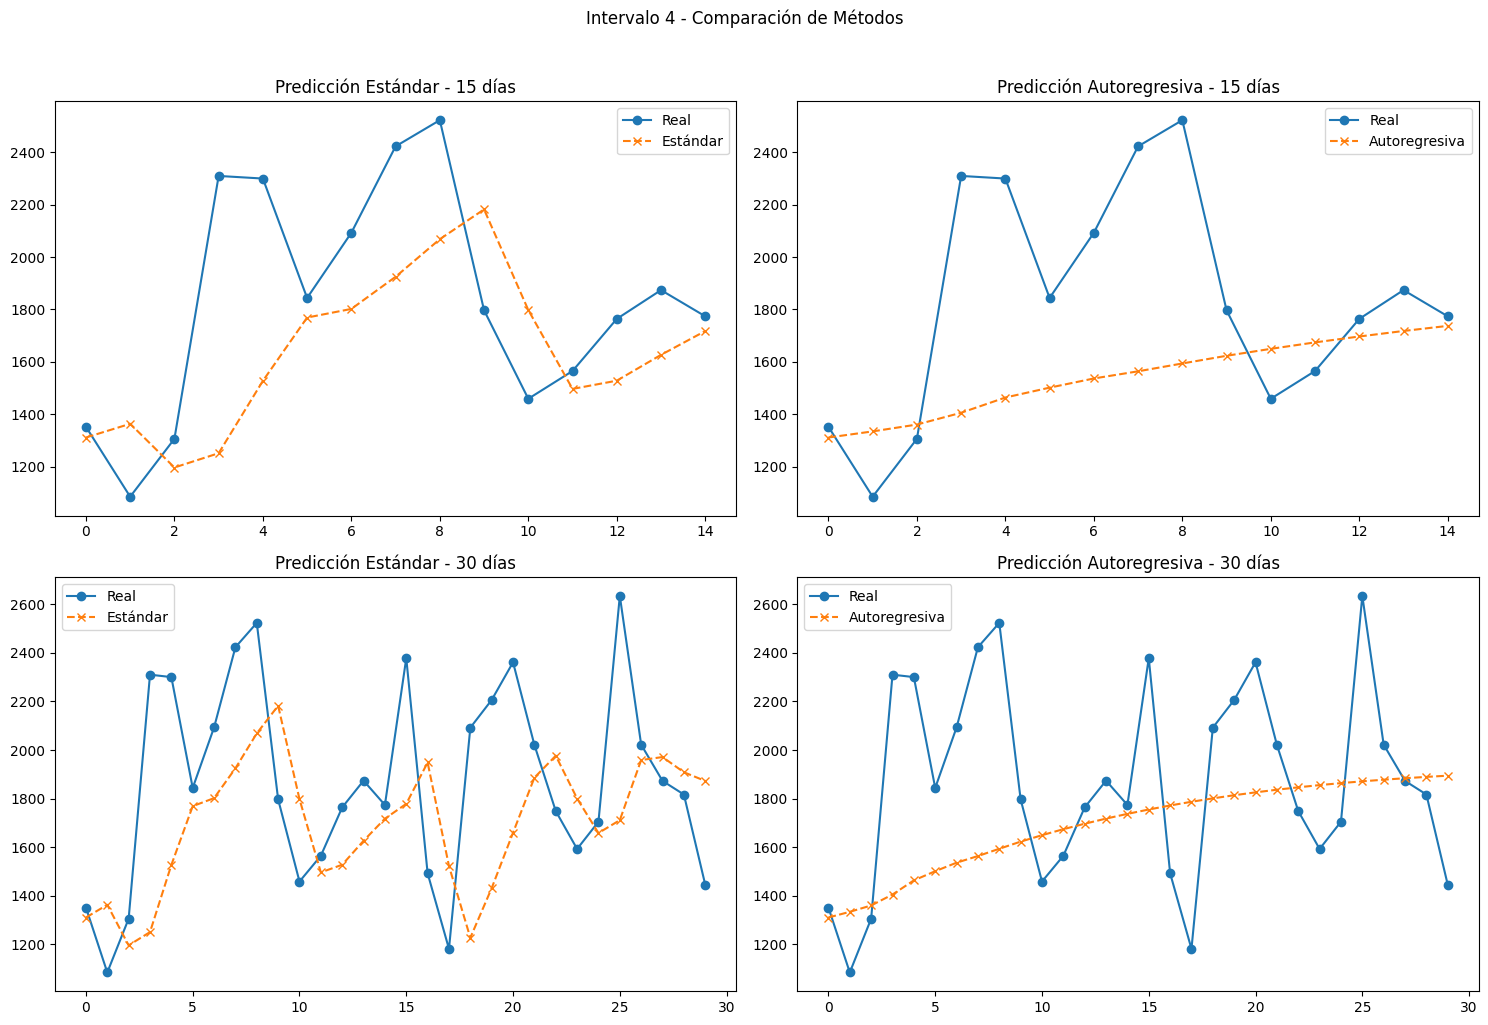


--------------------------------------------------
Entrenamiento excluyendo intervalo 5
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


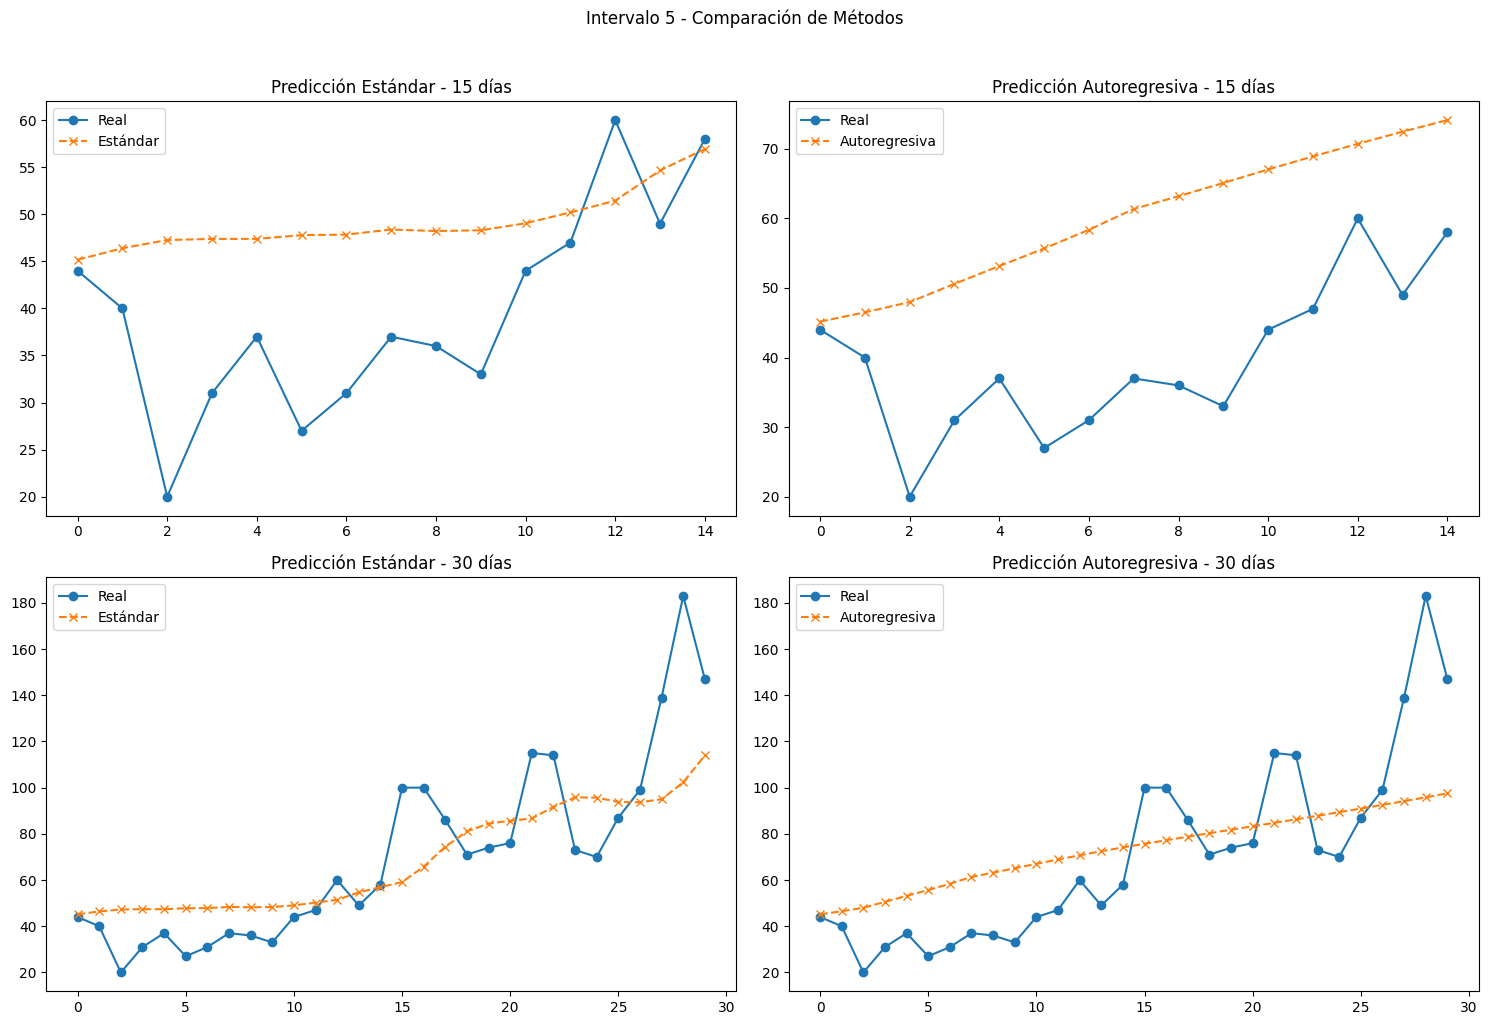


--------------------------------------------------
Entrenamiento excluyendo intervalo 6
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


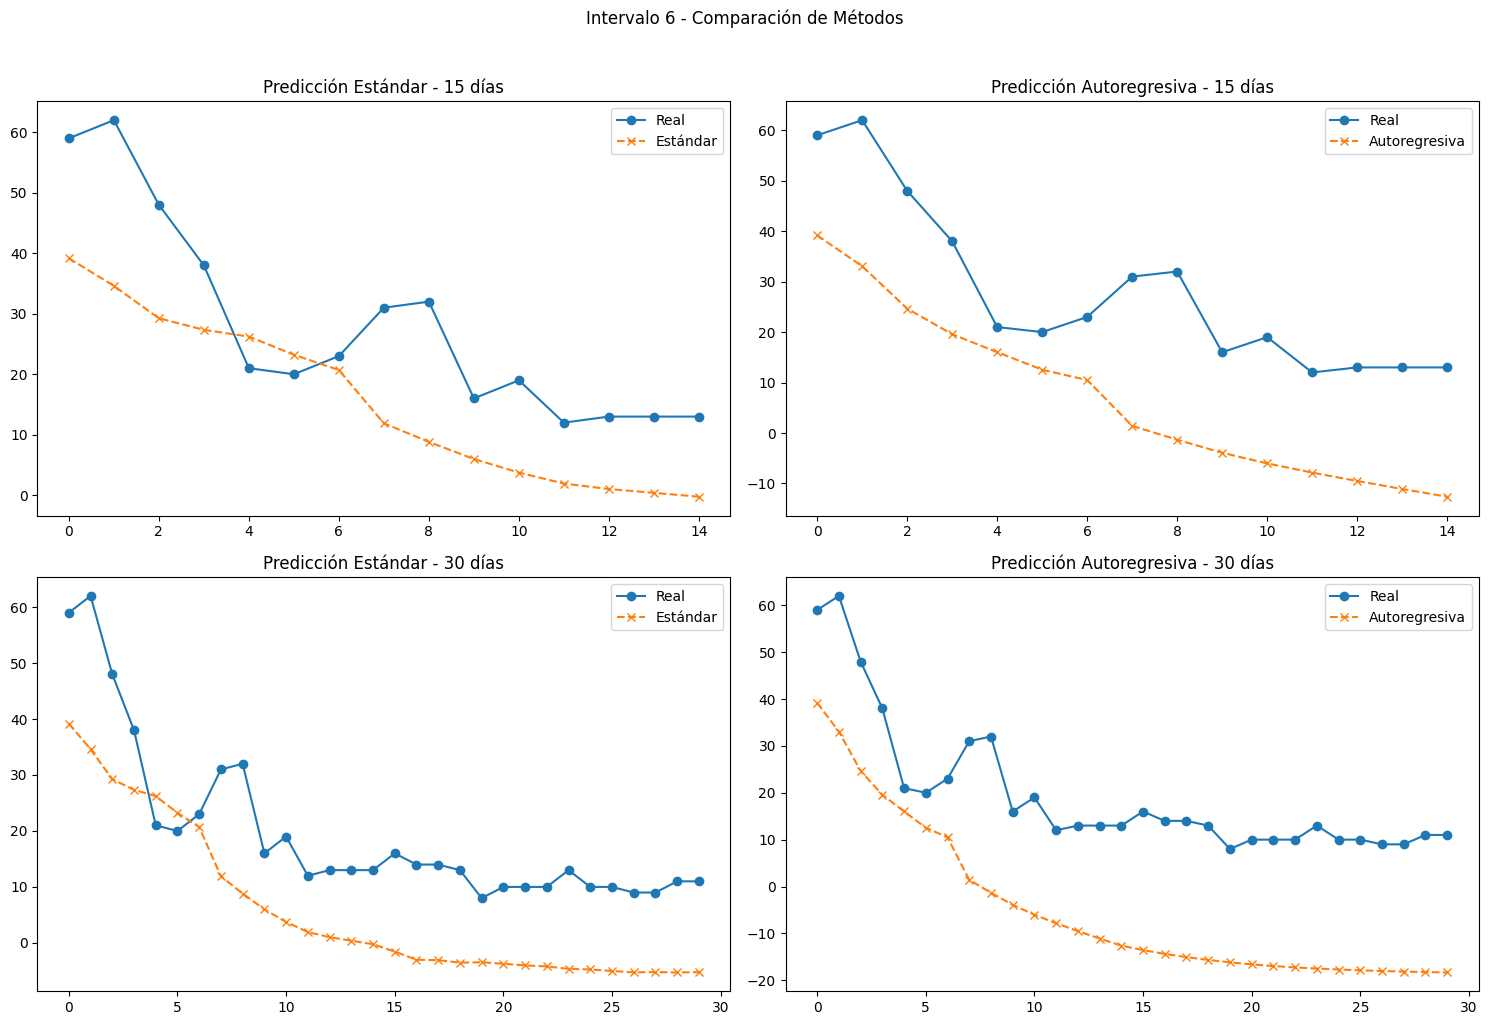


--------------------------------------------------
Entrenamiento excluyendo intervalo 7
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


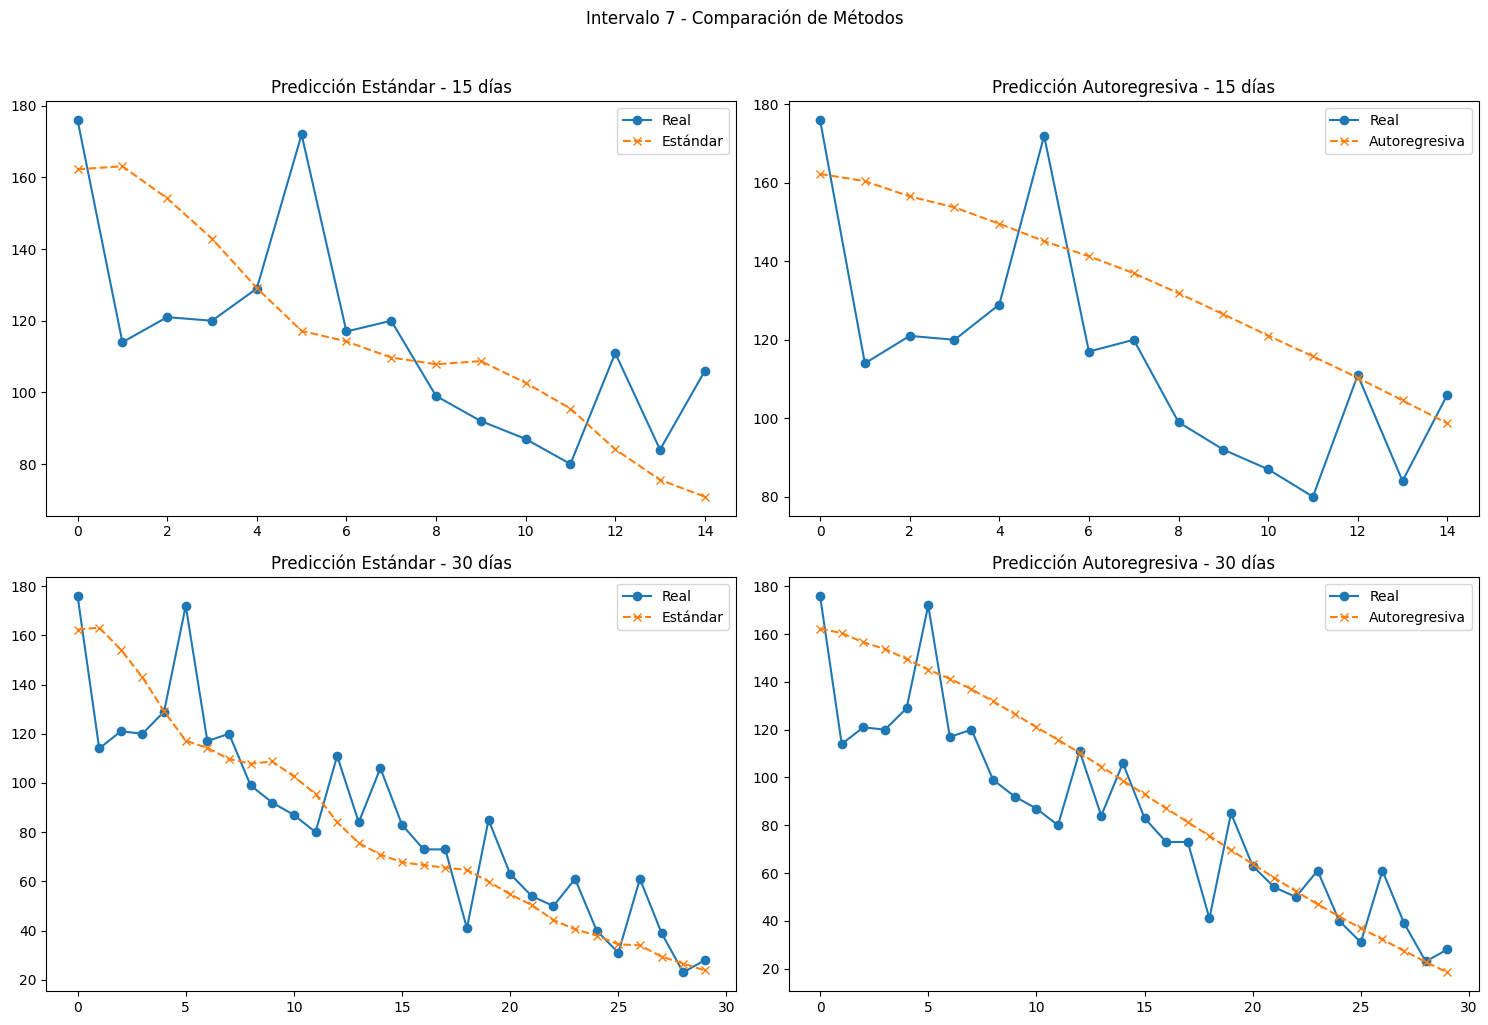


--------------------------------------------------
Entrenamiento excluyendo intervalo 8
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


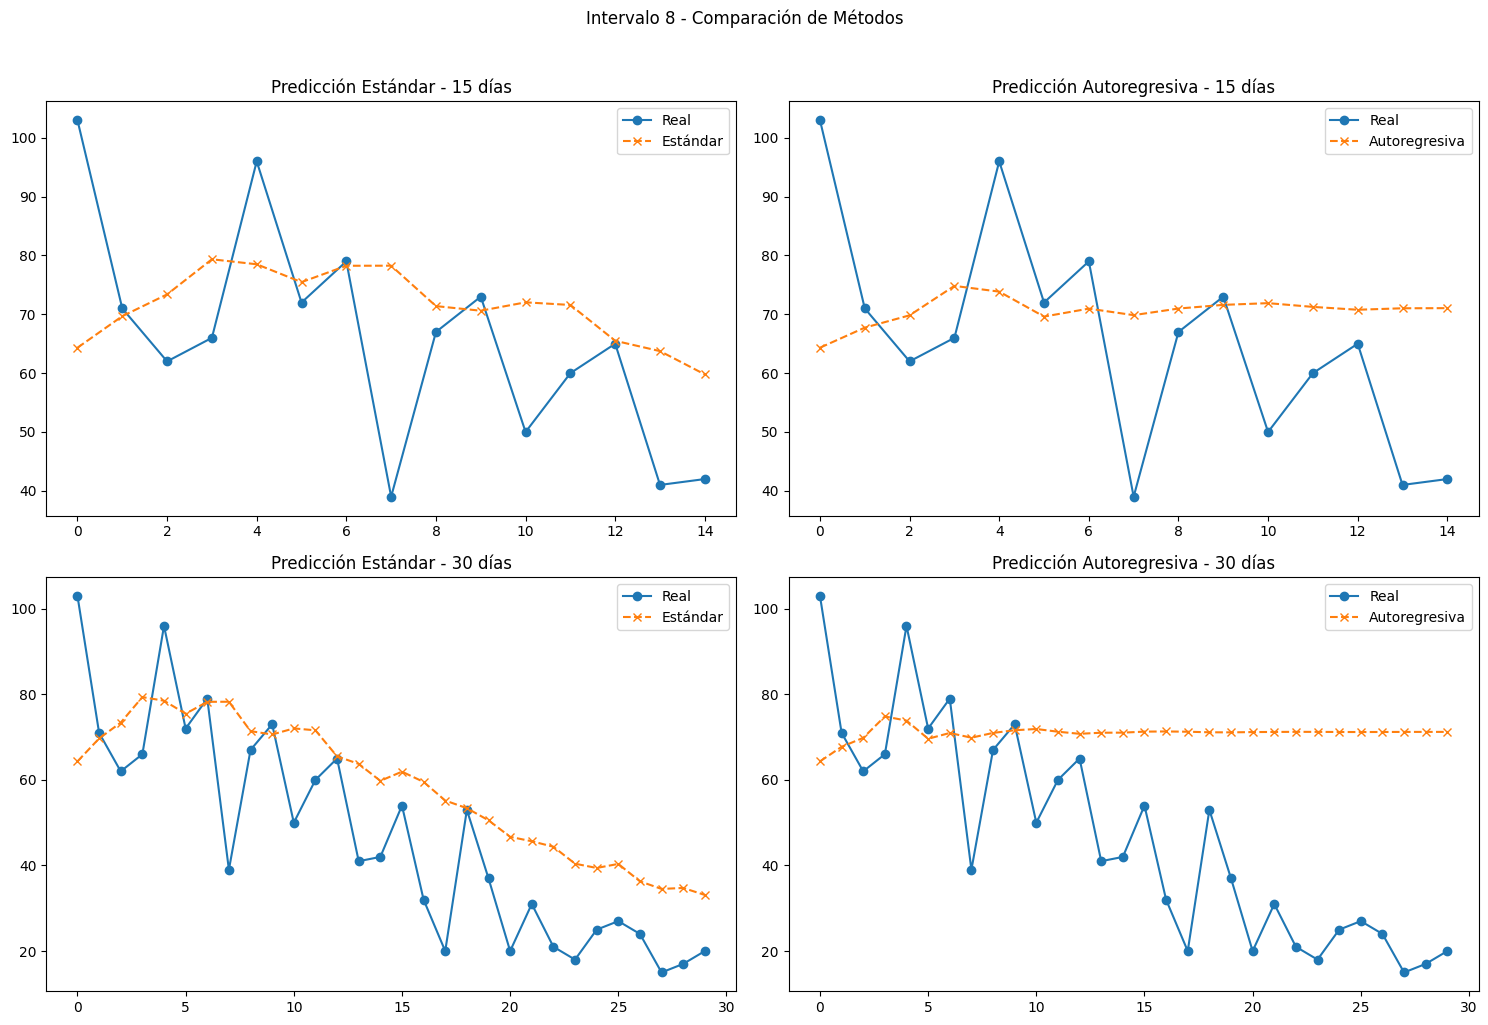


=== RESUMEN FINAL DE MÉTRICAS ===

Método: Estándar
  Horizonte 15 días:
    MAE:   72.7644
    MSE:   26773.7968
    SMAPE: 41.5557
  Horizonte 30 días:
    MAE:   74.7764
    MSE:   30101.9650
    SMAPE: 53.0750

Método: Autoregresivo
  Horizonte 15 días:
    MAE:   78.1633
    MSE:   34688.4530
    SMAPE: 50.0461
  Horizonte 30 días:
    MAE:   103.0876
    MSE:   46593.6086
    SMAPE: 63.8161


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# ====================== CONFIGURACIÓN GLOBAL ======================
WINDOW_SIZE = 7     # Tamaño de la ventana temporal (cambiable a 14, 30, etc.)
HORIZONTES = [15, 30]  # Pasos de predicción a evaluar
EPOCHS = 50          # Épocas de entrenamiento
BATCH_SIZE = 16      # Tamaño del batch
# ==================================================================

# Función para crear secuencias
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Función SMAPE
def smape(y_true, y_pred, eps=1e-8):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return 100 * np.mean(numerator / (denominator + eps))

# Función de predicción autoregresiva
def autoregressive_forecast(initial_sequence, steps, model, window_size):
    if len(initial_sequence) != window_size:
        raise ValueError(f"La secuencia inicial debe tener largo {window_size}")
    history = list(initial_sequence)
    preds = []
    for _ in range(steps):
        x_input = np.array(history[-window_size:]).reshape(1, window_size, 1)
        pred = model.predict(x_input, verbose=0)[0, 0]
        preds.append(pred)
        history.append(pred)
    return np.array(preds)

# Construcción del modelo LSTM (modular)
def build_lstm_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Inicialización de métricas usando diccionarios
metricas = {
    'std': {h: {'mae': [], 'mse': [], 'smape': []} for h in HORIZONTES},
    'auto': {h: {'mae': [], 'mse': [], 'smape': []} for h in HORIZONTES}
}

# Procesamiento de intervalos (asumiendo que df y intervalos_ordenados están definidos)
for test_interval in range(len(intervalos_ordenados)):
    print(f"\n{'-'*50}")
    print(f"Entrenamiento excluyendo intervalo {test_interval+1}")
    print(f"{'-'*50}")
    
    # 1. Separar datos de entrenamiento y prueba
    train_data = df[df['Intervalo'] != intervalos_ordenados[test_interval]]
    test_data = df[df['Intervalo'] == intervalos_ordenados[test_interval]]
    
    # Validar datos mínimos requeridos
    min_test_length = WINDOW_SIZE + max(HORIZONTES)
    if len(train_data) < WINDOW_SIZE or len(test_data) < min_test_length:
        print(f"Intervalo {test_interval+1} omitido: datos insuficientes")
        continue
    
    # 2. Normalización
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[['Frecuencia']])
    test_scaled = scaler.transform(test_data[['Frecuencia']])
    
    # 3. Crear secuencias de entrenamiento
    X_train, y_train = create_sequences(train_scaled, WINDOW_SIZE)
    X_train = X_train.reshape((X_train.shape[0], WINDOW_SIZE, 1))
    
    # 4. Entrenar modelo
    model = build_lstm_model(WINDOW_SIZE)
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # 5. Predicción estándar
    X_test, y_test = create_sequences(test_scaled, WINDOW_SIZE)
    if len(X_test) == 0:
        continue
    
    X_test = X_test.reshape((X_test.shape[0], WINDOW_SIZE, 1))
    y_pred_std = model.predict(X_test, verbose=0)
    y_pred_std = scaler.inverse_transform(y_pred_std)
    y_real_std = scaler.inverse_transform(test_scaled[WINDOW_SIZE:])
    
    # 6. Predicción autoregresiva
    initial_sequence = test_scaled[:WINDOW_SIZE, 0]
    max_horizon_auto = min(max(HORIZONTES), len(test_scaled) - WINDOW_SIZE)
    y_pred_auto = autoregressive_forecast(initial_sequence, max_horizon_auto, model, WINDOW_SIZE)
    y_pred_auto = scaler.inverse_transform(y_pred_auto.reshape(-1, 1))
    y_real_auto = scaler.inverse_transform(test_scaled[WINDOW_SIZE:WINDOW_SIZE + max_horizon_auto])
    
    # 7. Cálculo de métricas para cada horizonte
    for horizonte in HORIZONTES:
        # Predicción estándar
        n_steps_std = min(horizonte, len(y_pred_std))
        y_pred_std_trunc = y_pred_std[:n_steps_std]
        y_real_std_trunc = y_real_std[:n_steps_std]
        
        metricas['std'][horizonte]['mae'].append(mean_absolute_error(y_real_std_trunc, y_pred_std_trunc))
        metricas['std'][horizonte]['mse'].append(mean_squared_error(y_real_std_trunc, y_pred_std_trunc))
        metricas['std'][horizonte]['smape'].append(smape(y_real_std_trunc, y_pred_std_trunc))
        
        # Predicción autoregresiva
        n_steps_auto = min(horizonte, len(y_pred_auto))
        y_pred_auto_trunc = y_pred_auto[:n_steps_auto]
        y_real_auto_trunc = y_real_auto[:n_steps_auto]
        
        metricas['auto'][horizonte]['mae'].append(mean_absolute_error(y_real_auto_trunc, y_pred_auto_trunc))
        metricas['auto'][horizonte]['mse'].append(mean_squared_error(y_real_auto_trunc, y_pred_auto_trunc))
        metricas['auto'][horizonte]['smape'].append(smape(y_real_auto_trunc, y_pred_auto_trunc))
    
    # 8. Visualización dinámica por horizontes
    fig, axs = plt.subplots(len(HORIZONTES), 2, figsize=(15, 5*len(HORIZONTES)))
    plt.suptitle(f'Intervalo {test_interval+1} - Comparación de Métodos', y=1.02)
    
    for idx, horizonte in enumerate(HORIZONTES):
        # Predicción estándar
        axs[idx, 0].plot(y_real_std[:horizonte], label='Real', marker='o')
        axs[idx, 0].plot(y_pred_std[:horizonte], label='Estándar', linestyle='--', marker='x')
        axs[idx, 0].set_title(f'Predicción Estándar - {horizonte} días')
        axs[idx, 0].legend()
        
        # Predicción autoregresiva
        axs[idx, 1].plot(y_real_auto[:horizonte], label='Real', marker='o')
        axs[idx, 1].plot(y_pred_auto[:horizonte], label='Autoregresiva', linestyle='--', marker='x')
        axs[idx, 1].set_title(f'Predicción Autoregresiva - {horizonte} días')
        axs[idx, 1].legend()
    
    plt.tight_layout()
    plt.show()

# 9. Reporte final de métricas
print("\n=== RESUMEN FINAL DE MÉTRICAS ===")
for metodo in ['std', 'auto']:
    print(f"\nMétodo: {'Estándar' if metodo == 'std' else 'Autoregresivo'}")
    for horizonte in HORIZONTES:
        print(f"  Horizonte {horizonte} días:")
        print(f"    MAE:   {np.mean(metricas[metodo][horizonte]['mae']):.4f}")
        print(f"    MSE:   {np.mean(metricas[metodo][horizonte]['mse']):.4f}")
        print(f"    SMAPE: {np.mean(metricas[metodo][horizonte]['smape']):.4f}")

## Modelos ventana de 14 días


--------------------------------------------------
Entrenamiento excluyendo intervalo 1
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


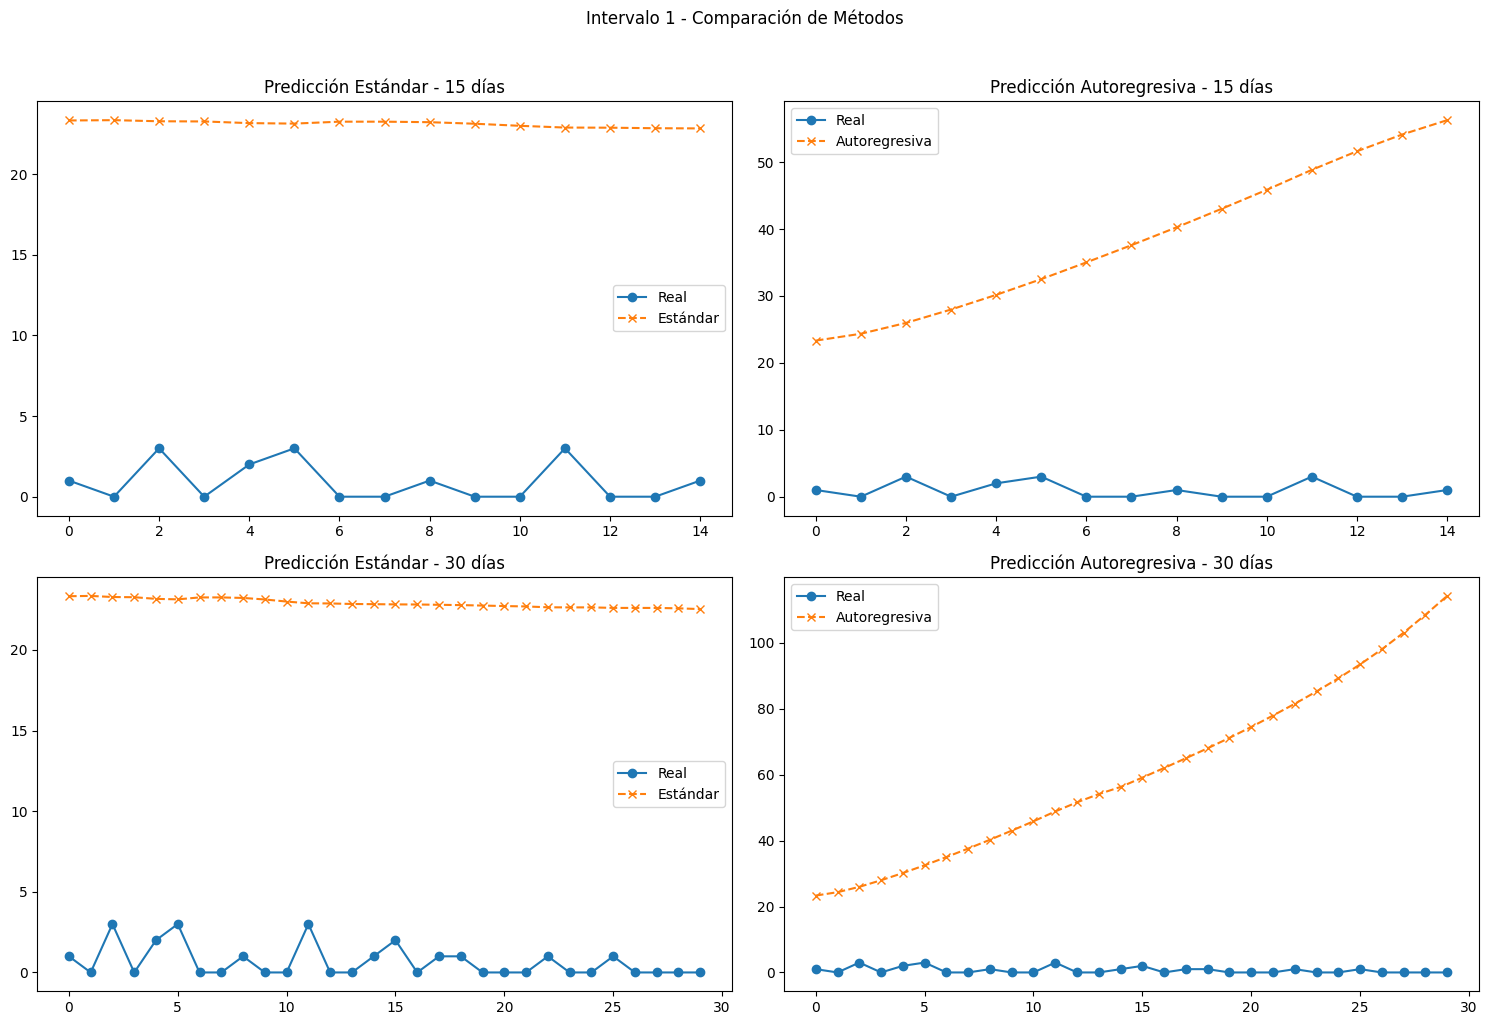


--------------------------------------------------
Entrenamiento excluyendo intervalo 2
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


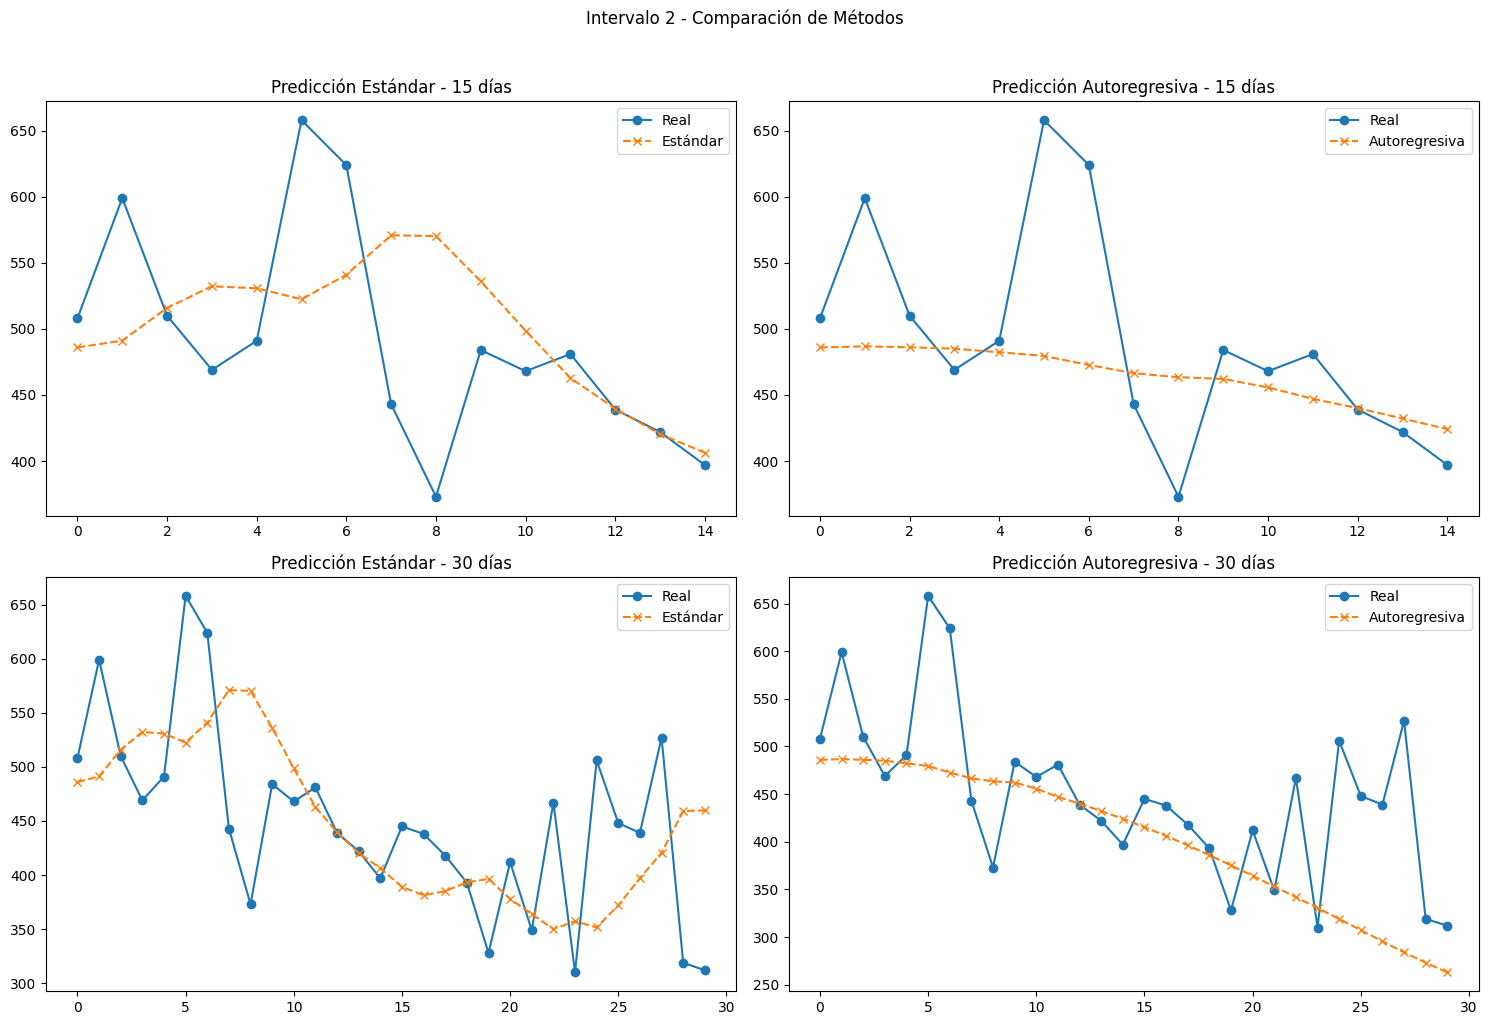


--------------------------------------------------
Entrenamiento excluyendo intervalo 3
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


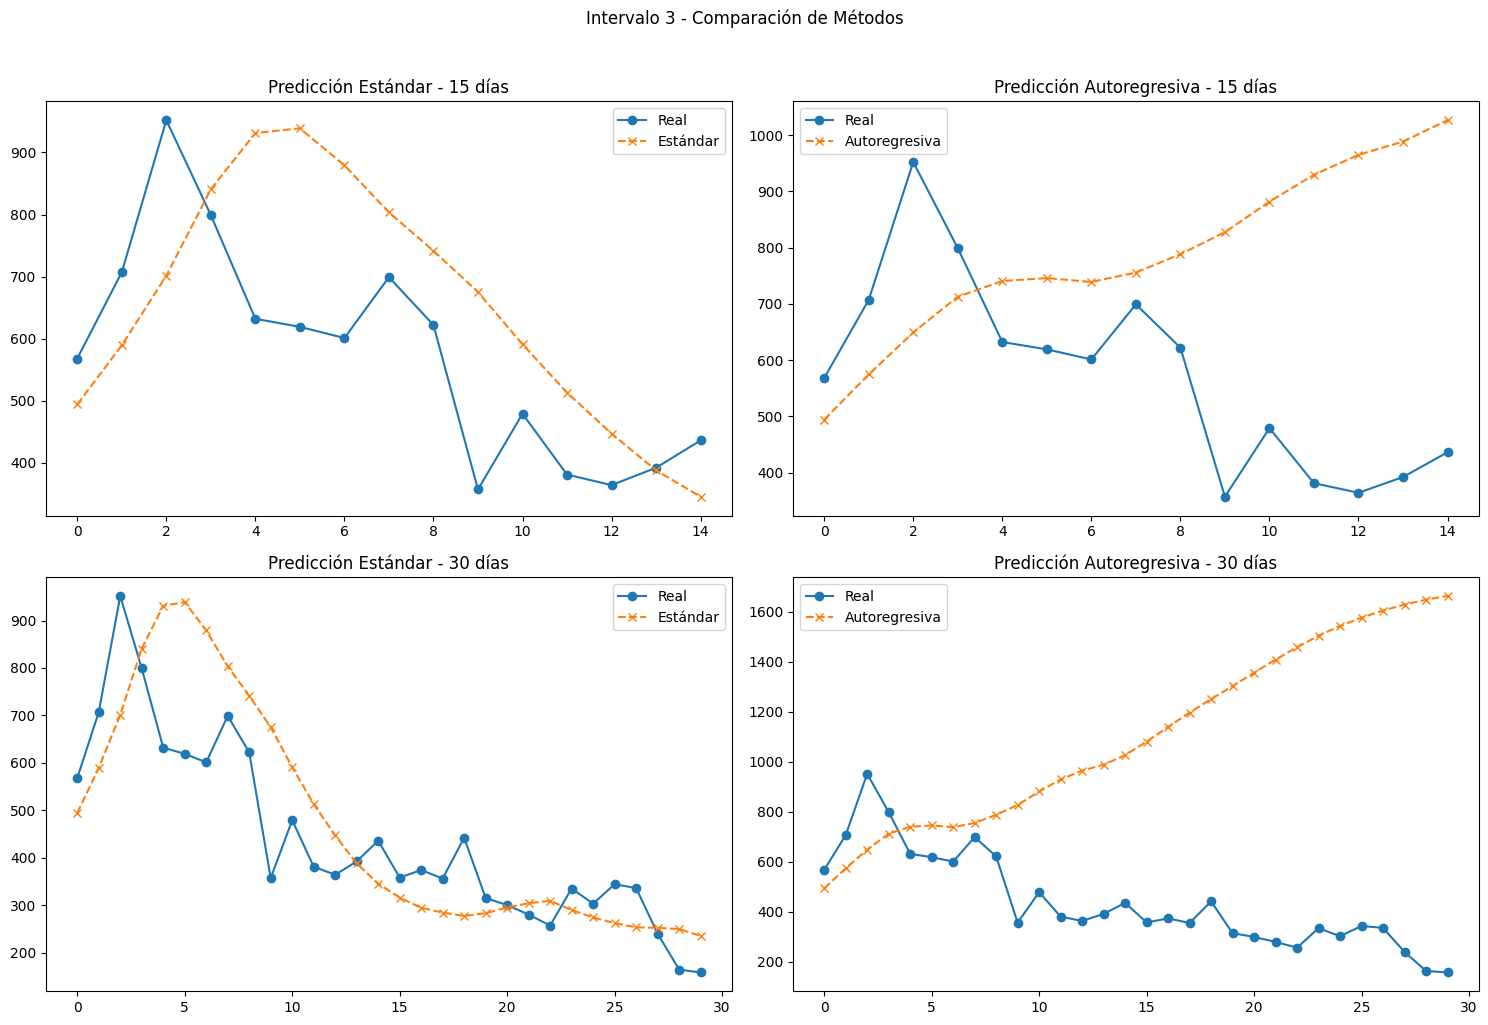


--------------------------------------------------
Entrenamiento excluyendo intervalo 4
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


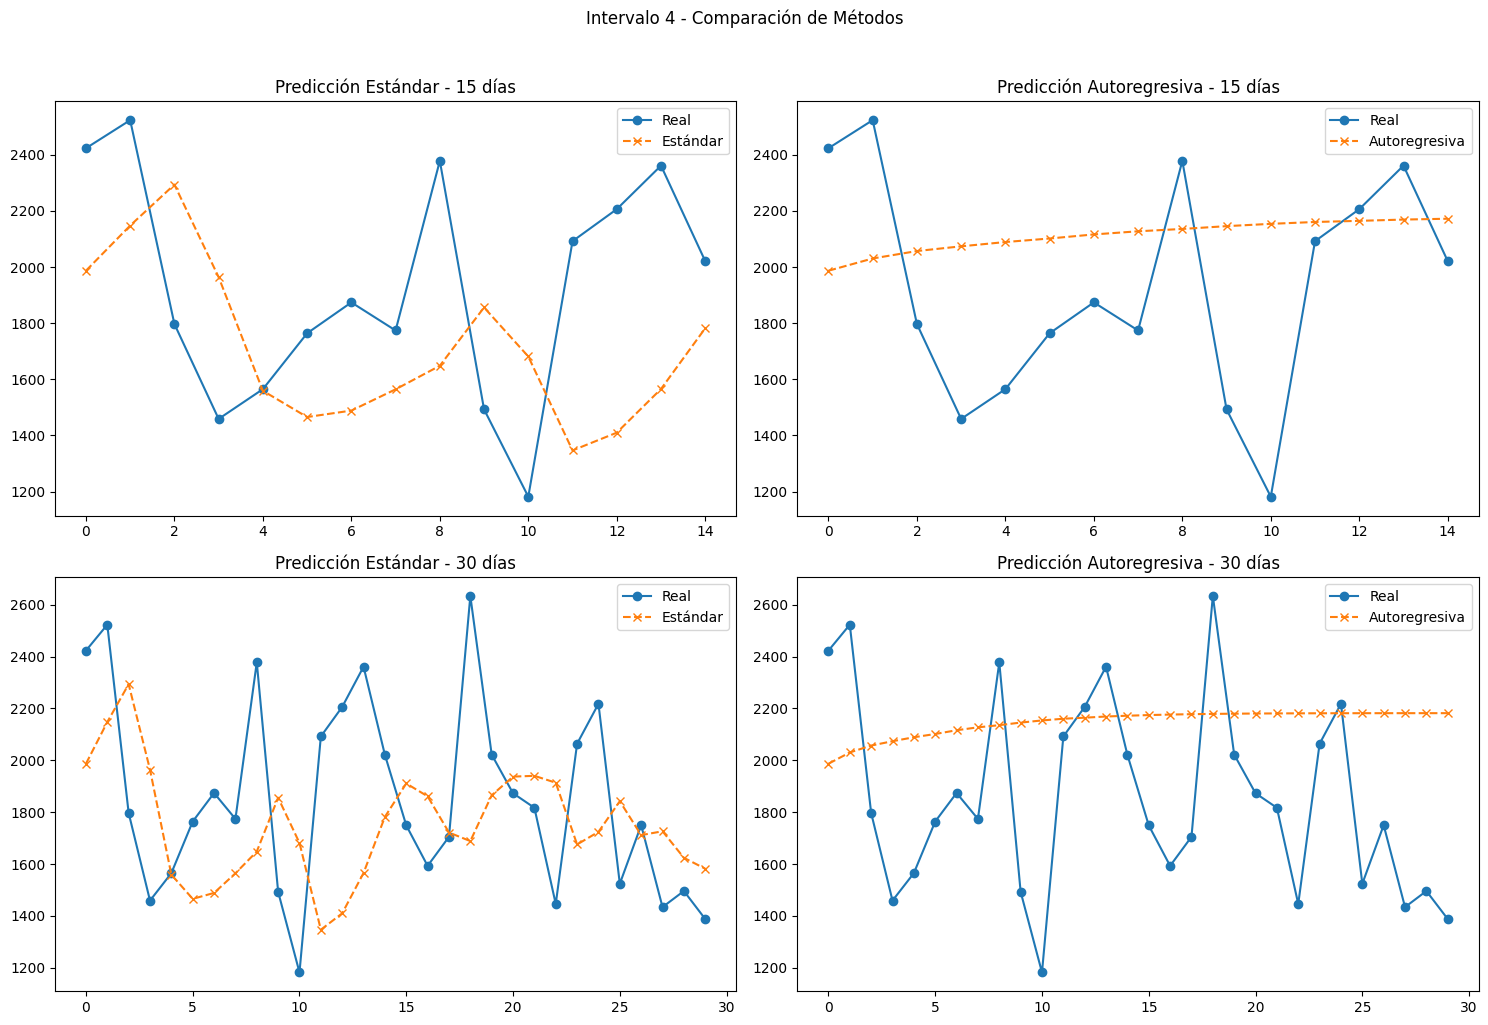


--------------------------------------------------
Entrenamiento excluyendo intervalo 5
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


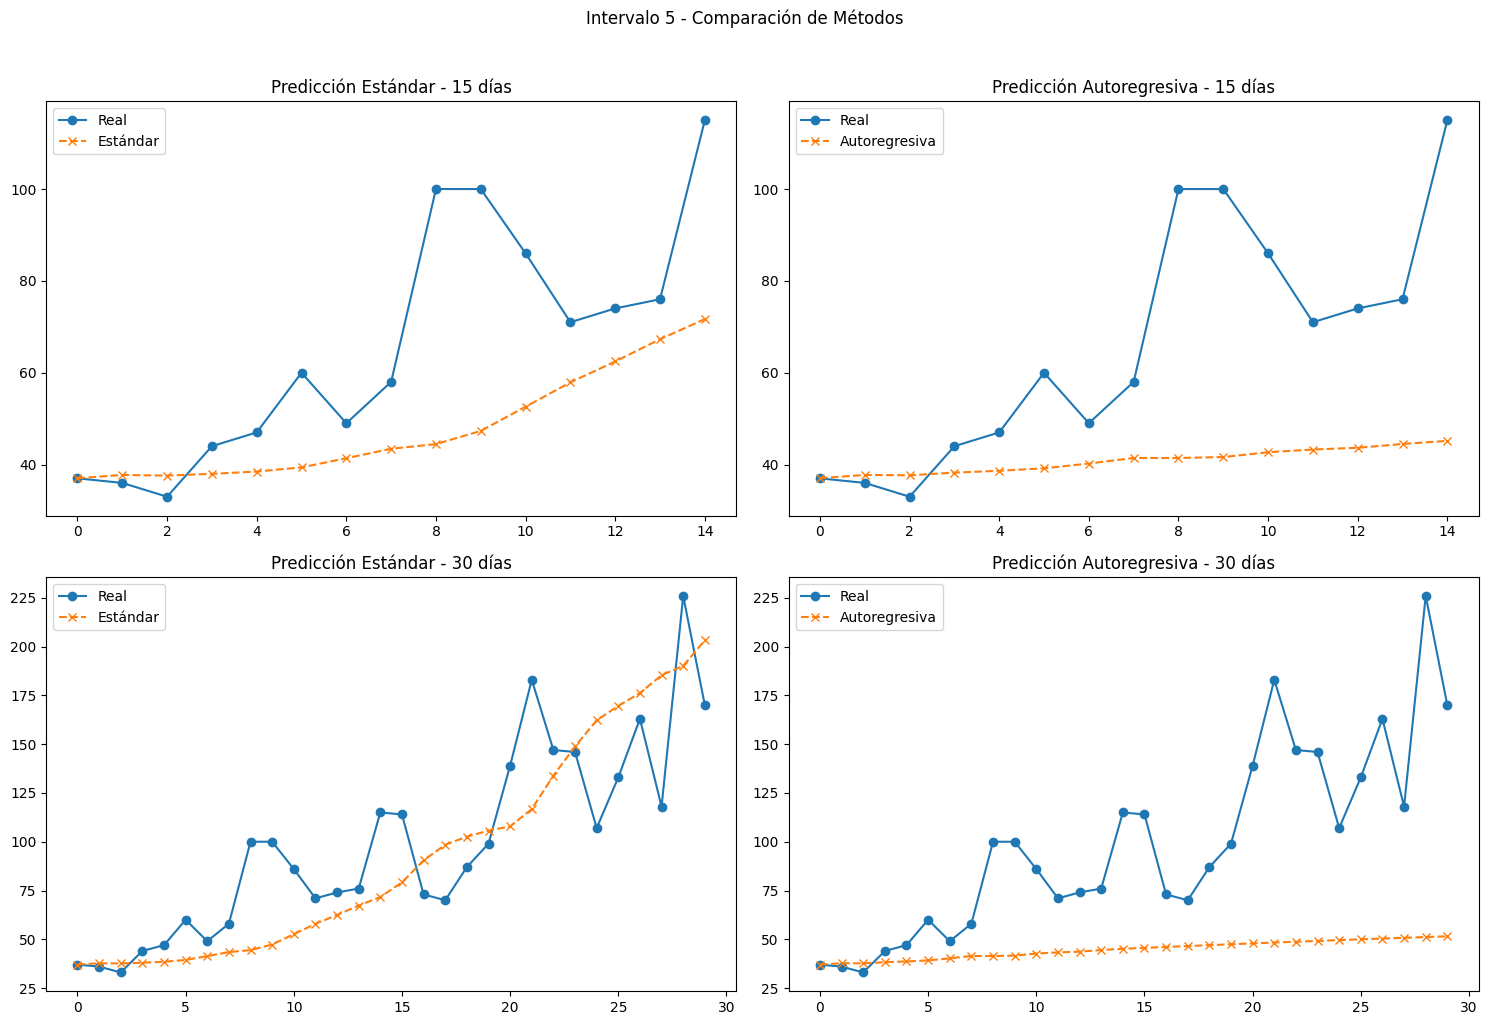


--------------------------------------------------
Entrenamiento excluyendo intervalo 6
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


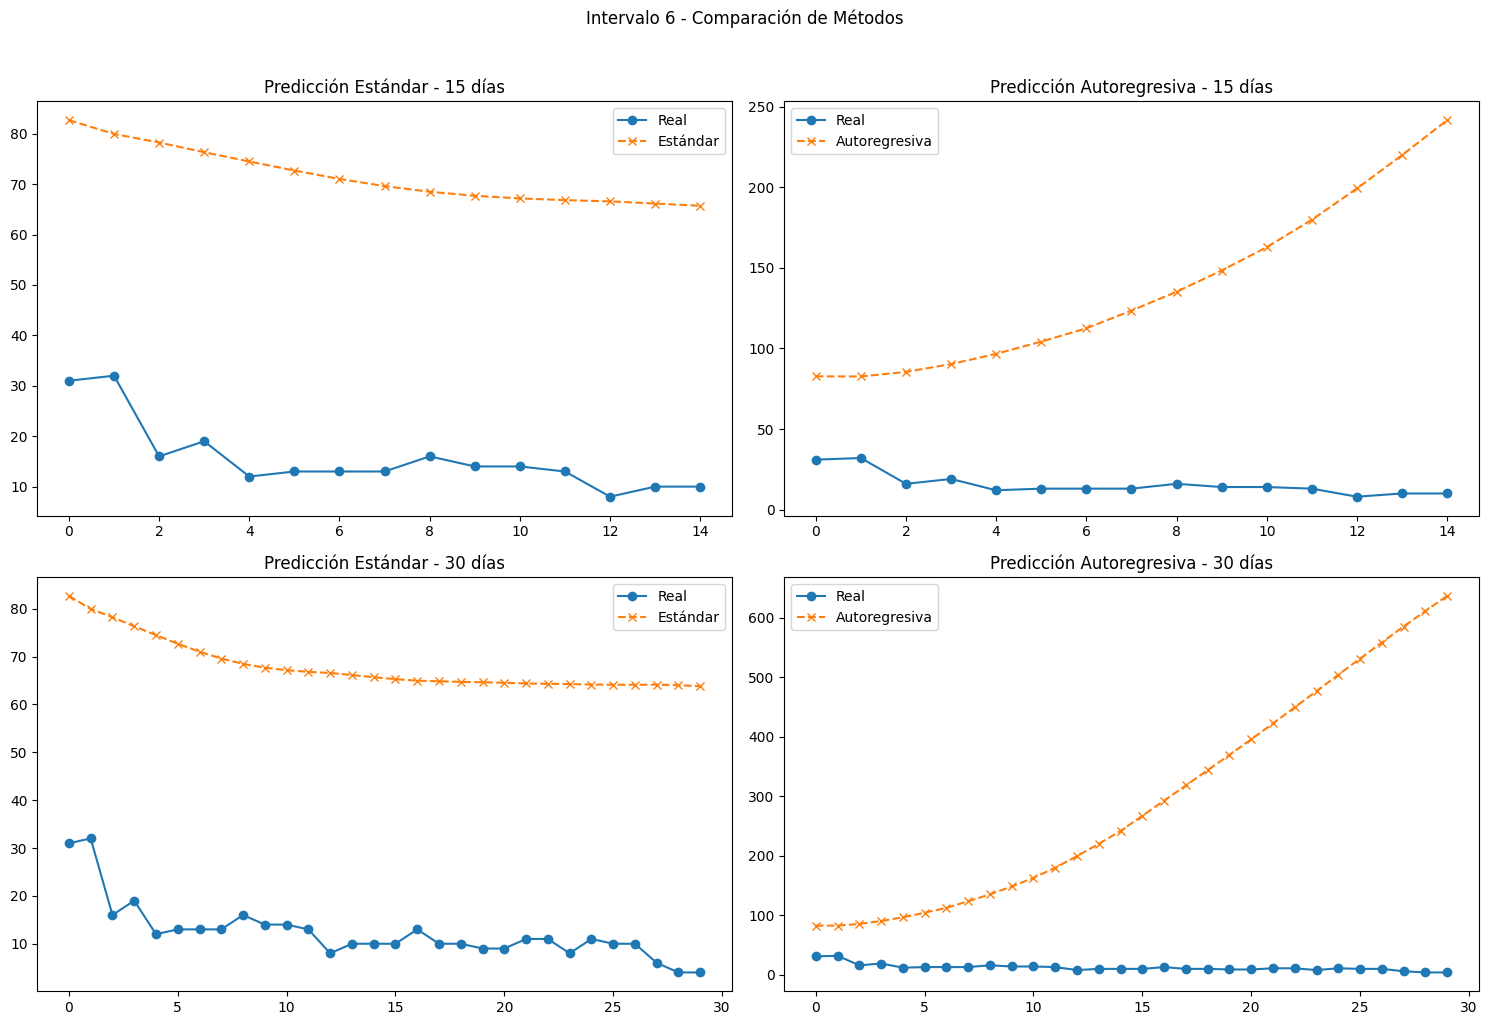


--------------------------------------------------
Entrenamiento excluyendo intervalo 7
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


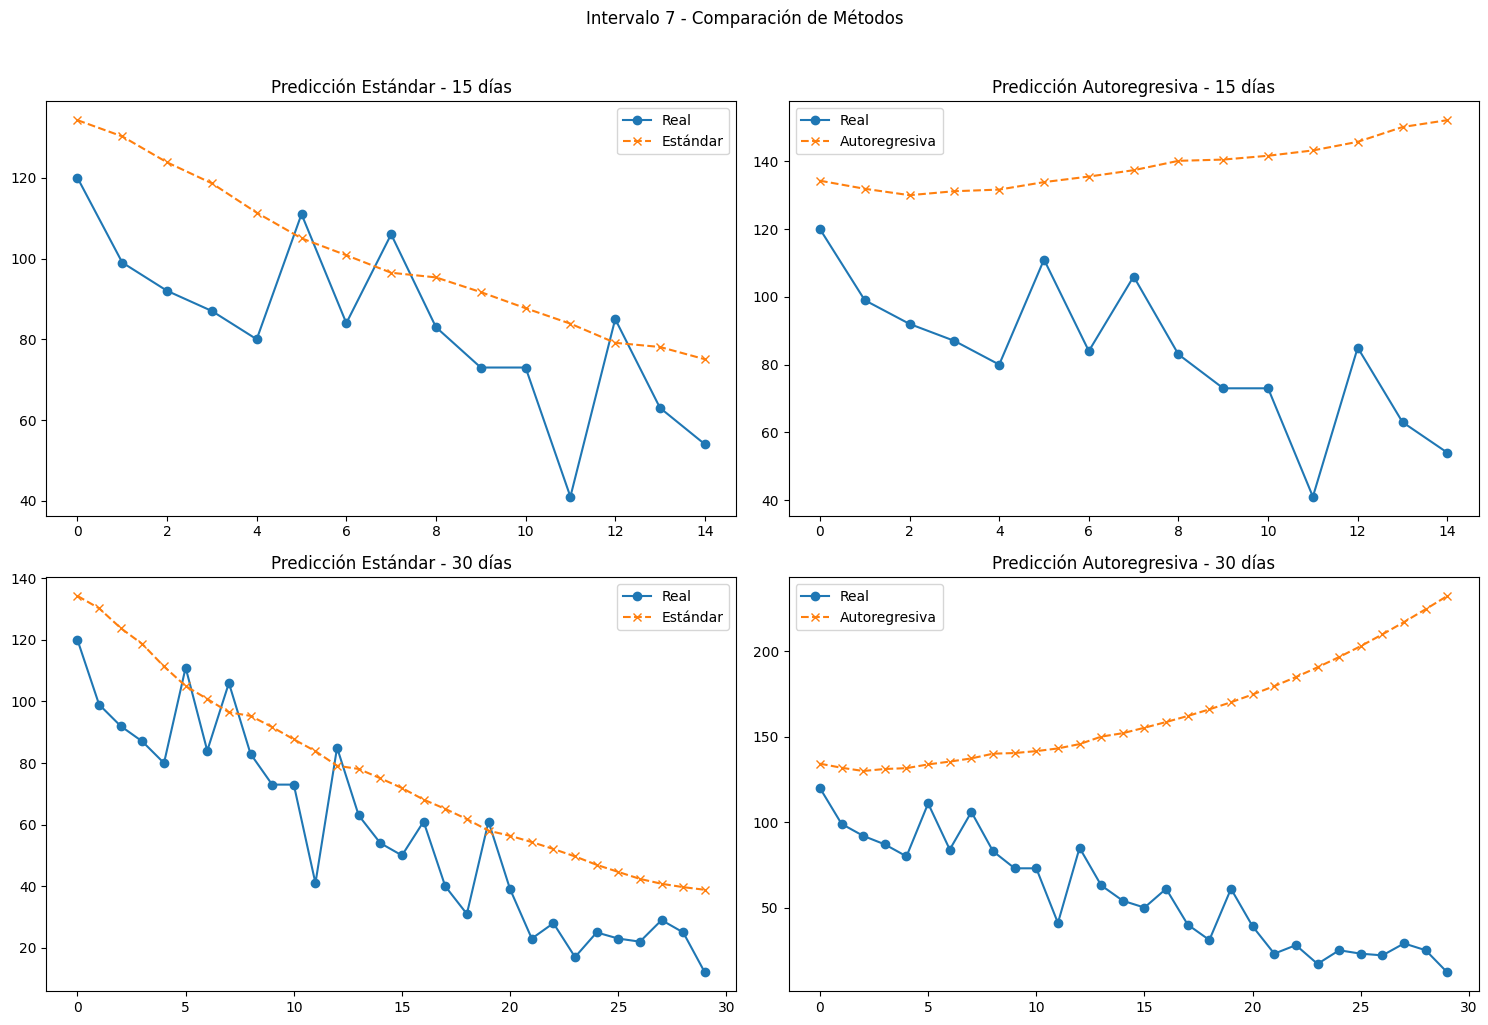


--------------------------------------------------
Entrenamiento excluyendo intervalo 8
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


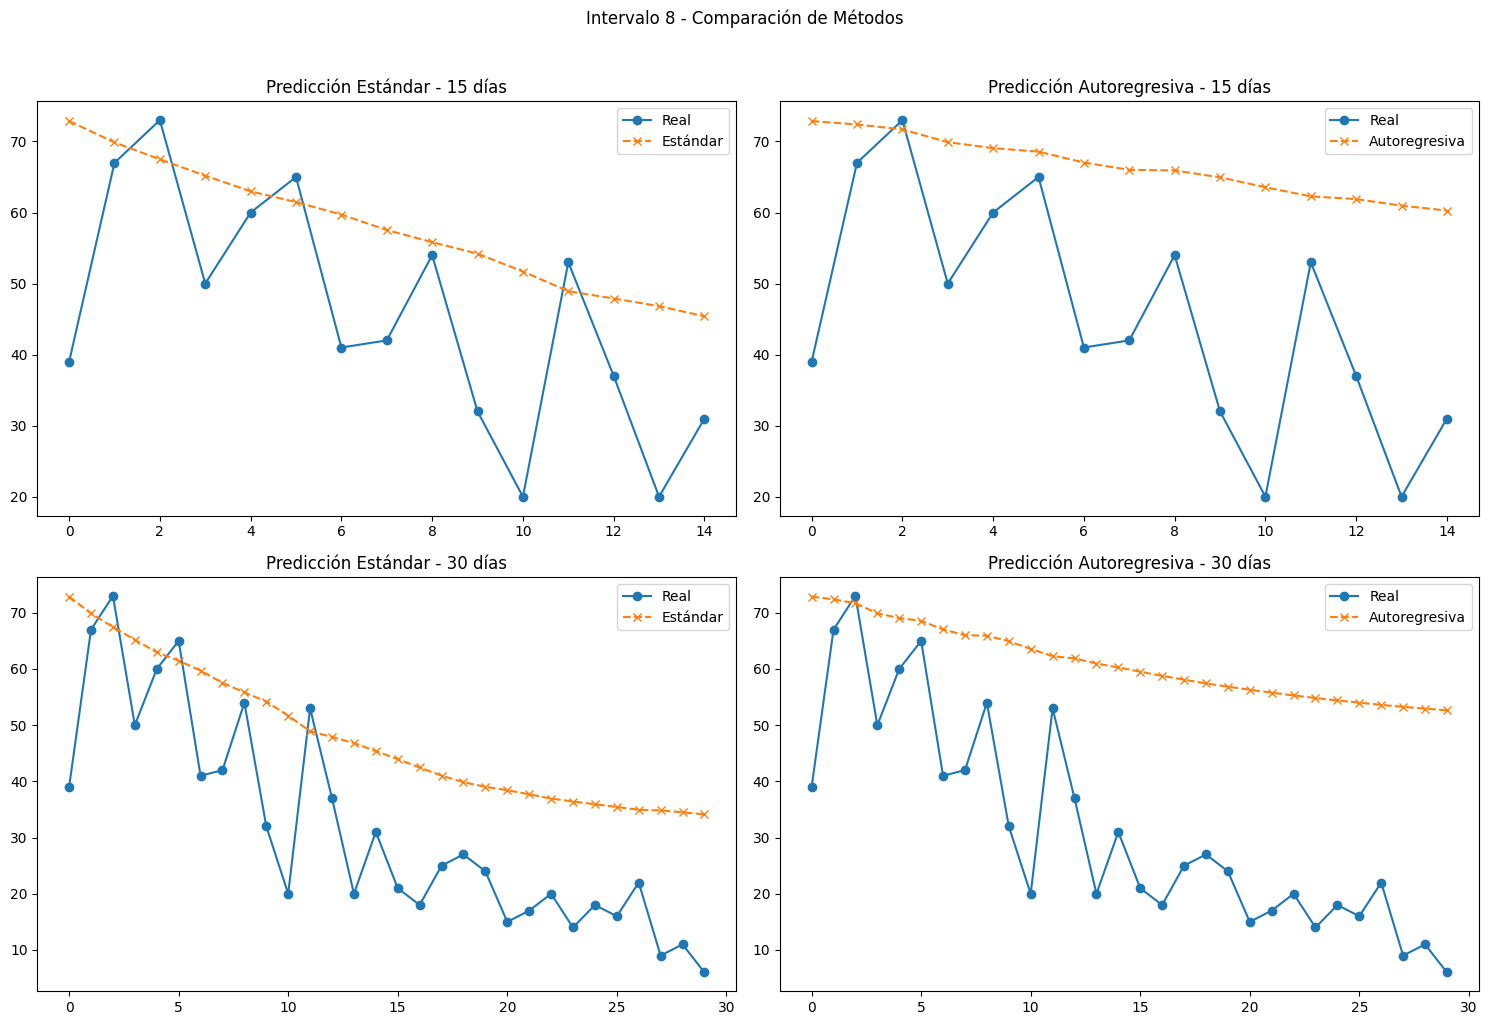


=== RESUMEN FINAL DE MÉTRICAS ===

Método: Estándar
  Horizonte 15 días:
    MAE:   100.7298
    MSE:   38420.5766
    SMAPE: 57.6574
  Horizonte 30 días:
    MAE:   84.8356
    MSE:   28240.7490
    SMAPE: 63.3207

Método: Autoregresivo
  Horizonte 15 días:
    MAE:   121.9891
    MSE:   44573.6590
    SMAPE: 68.8021
  Horizonte 30 días:
    MAE:   214.9191
    MSE:   137619.6254
    SMAPE: 90.3535


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# ====================== CONFIGURACIÓN GLOBAL ======================
WINDOW_SIZE = 14     # Tamaño de la ventana temporal (cambiable a 14, 30, etc.)
HORIZONTES = [15, 30]  # Pasos de predicción a evaluar
EPOCHS = 50          # Épocas de entrenamiento
BATCH_SIZE = 16      # Tamaño del batch
# ==================================================================

# Función para crear secuencias
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Función SMAPE
def smape(y_true, y_pred, eps=1e-8):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return 100 * np.mean(numerator / (denominator + eps))

# Función de predicción autoregresiva
def autoregressive_forecast(initial_sequence, steps, model, window_size):
    if len(initial_sequence) != window_size:
        raise ValueError(f"La secuencia inicial debe tener largo {window_size}")
    history = list(initial_sequence)
    preds = []
    for _ in range(steps):
        x_input = np.array(history[-window_size:]).reshape(1, window_size, 1)
        pred = model.predict(x_input, verbose=0)[0, 0]
        preds.append(pred)
        history.append(pred)
    return np.array(preds)

# Construcción del modelo LSTM (modular)
def build_lstm_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Inicialización de métricas usando diccionarios
metricas = {
    'std': {h: {'mae': [], 'mse': [], 'smape': []} for h in HORIZONTES},
    'auto': {h: {'mae': [], 'mse': [], 'smape': []} for h in HORIZONTES}
}

# Procesamiento de intervalos (asumiendo que df y intervalos_ordenados están definidos)
for test_interval in range(len(intervalos_ordenados)):
    print(f"\n{'-'*50}")
    print(f"Entrenamiento excluyendo intervalo {test_interval+1}")
    print(f"{'-'*50}")
    
    # 1. Separar datos de entrenamiento y prueba
    train_data = df[df['Intervalo'] != intervalos_ordenados[test_interval]]
    test_data = df[df['Intervalo'] == intervalos_ordenados[test_interval]]
    
    # Validar datos mínimos requeridos
    min_test_length = WINDOW_SIZE + max(HORIZONTES)
    if len(train_data) < WINDOW_SIZE or len(test_data) < min_test_length:
        print(f"Intervalo {test_interval+1} omitido: datos insuficientes")
        continue
    
    # 2. Normalización
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[['Frecuencia']])
    test_scaled = scaler.transform(test_data[['Frecuencia']])
    
    # 3. Crear secuencias de entrenamiento
    X_train, y_train = create_sequences(train_scaled, WINDOW_SIZE)
    X_train = X_train.reshape((X_train.shape[0], WINDOW_SIZE, 1))
    
    # 4. Entrenar modelo
    model = build_lstm_model(WINDOW_SIZE)
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # 5. Predicción estándar
    X_test, y_test = create_sequences(test_scaled, WINDOW_SIZE)
    if len(X_test) == 0:
        continue
    
    X_test = X_test.reshape((X_test.shape[0], WINDOW_SIZE, 1))
    y_pred_std = model.predict(X_test, verbose=0)
    y_pred_std = scaler.inverse_transform(y_pred_std)
    y_real_std = scaler.inverse_transform(test_scaled[WINDOW_SIZE:])
    
    # 6. Predicción autoregresiva
    initial_sequence = test_scaled[:WINDOW_SIZE, 0]
    max_horizon_auto = min(max(HORIZONTES), len(test_scaled) - WINDOW_SIZE)
    y_pred_auto = autoregressive_forecast(initial_sequence, max_horizon_auto, model, WINDOW_SIZE)
    y_pred_auto = scaler.inverse_transform(y_pred_auto.reshape(-1, 1))
    y_real_auto = scaler.inverse_transform(test_scaled[WINDOW_SIZE:WINDOW_SIZE + max_horizon_auto])
    
    # 7. Cálculo de métricas para cada horizonte
    for horizonte in HORIZONTES:
        # Predicción estándar
        n_steps_std = min(horizonte, len(y_pred_std))
        y_pred_std_trunc = y_pred_std[:n_steps_std]
        y_real_std_trunc = y_real_std[:n_steps_std]
        
        metricas['std'][horizonte]['mae'].append(mean_absolute_error(y_real_std_trunc, y_pred_std_trunc))
        metricas['std'][horizonte]['mse'].append(mean_squared_error(y_real_std_trunc, y_pred_std_trunc))
        metricas['std'][horizonte]['smape'].append(smape(y_real_std_trunc, y_pred_std_trunc))
        
        # Predicción autoregresiva
        n_steps_auto = min(horizonte, len(y_pred_auto))
        y_pred_auto_trunc = y_pred_auto[:n_steps_auto]
        y_real_auto_trunc = y_real_auto[:n_steps_auto]
        
        metricas['auto'][horizonte]['mae'].append(mean_absolute_error(y_real_auto_trunc, y_pred_auto_trunc))
        metricas['auto'][horizonte]['mse'].append(mean_squared_error(y_real_auto_trunc, y_pred_auto_trunc))
        metricas['auto'][horizonte]['smape'].append(smape(y_real_auto_trunc, y_pred_auto_trunc))
    
    # 8. Visualización dinámica por horizontes
    fig, axs = plt.subplots(len(HORIZONTES), 2, figsize=(15, 5*len(HORIZONTES)))
    plt.suptitle(f'Intervalo {test_interval+1} - Comparación de Métodos', y=1.02)
    
    for idx, horizonte in enumerate(HORIZONTES):
        # Predicción estándar
        axs[idx, 0].plot(y_real_std[:horizonte], label='Real', marker='o')
        axs[idx, 0].plot(y_pred_std[:horizonte], label='Estándar', linestyle='--', marker='x')
        axs[idx, 0].set_title(f'Predicción Estándar - {horizonte} días')
        axs[idx, 0].legend()
        
        # Predicción autoregresiva
        axs[idx, 1].plot(y_real_auto[:horizonte], label='Real', marker='o')
        axs[idx, 1].plot(y_pred_auto[:horizonte], label='Autoregresiva', linestyle='--', marker='x')
        axs[idx, 1].set_title(f'Predicción Autoregresiva - {horizonte} días')
        axs[idx, 1].legend()
    
    plt.tight_layout()
    plt.show()

# 9. Reporte final de métricas
print("\n=== RESUMEN FINAL DE MÉTRICAS ===")
for metodo in ['std', 'auto']:
    print(f"\nMétodo: {'Estándar' if metodo == 'std' else 'Autoregresivo'}")
    for horizonte in HORIZONTES:
        print(f"  Horizonte {horizonte} días:")
        print(f"    MAE:   {np.mean(metricas[metodo][horizonte]['mae']):.4f}")
        print(f"    MSE:   {np.mean(metricas[metodo][horizonte]['mse']):.4f}")
        print(f"    SMAPE: {np.mean(metricas[metodo][horizonte]['smape']):.4f}")

## Modelos ventana de 21 días


--------------------------------------------------
Entrenamiento excluyendo intervalo 1
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


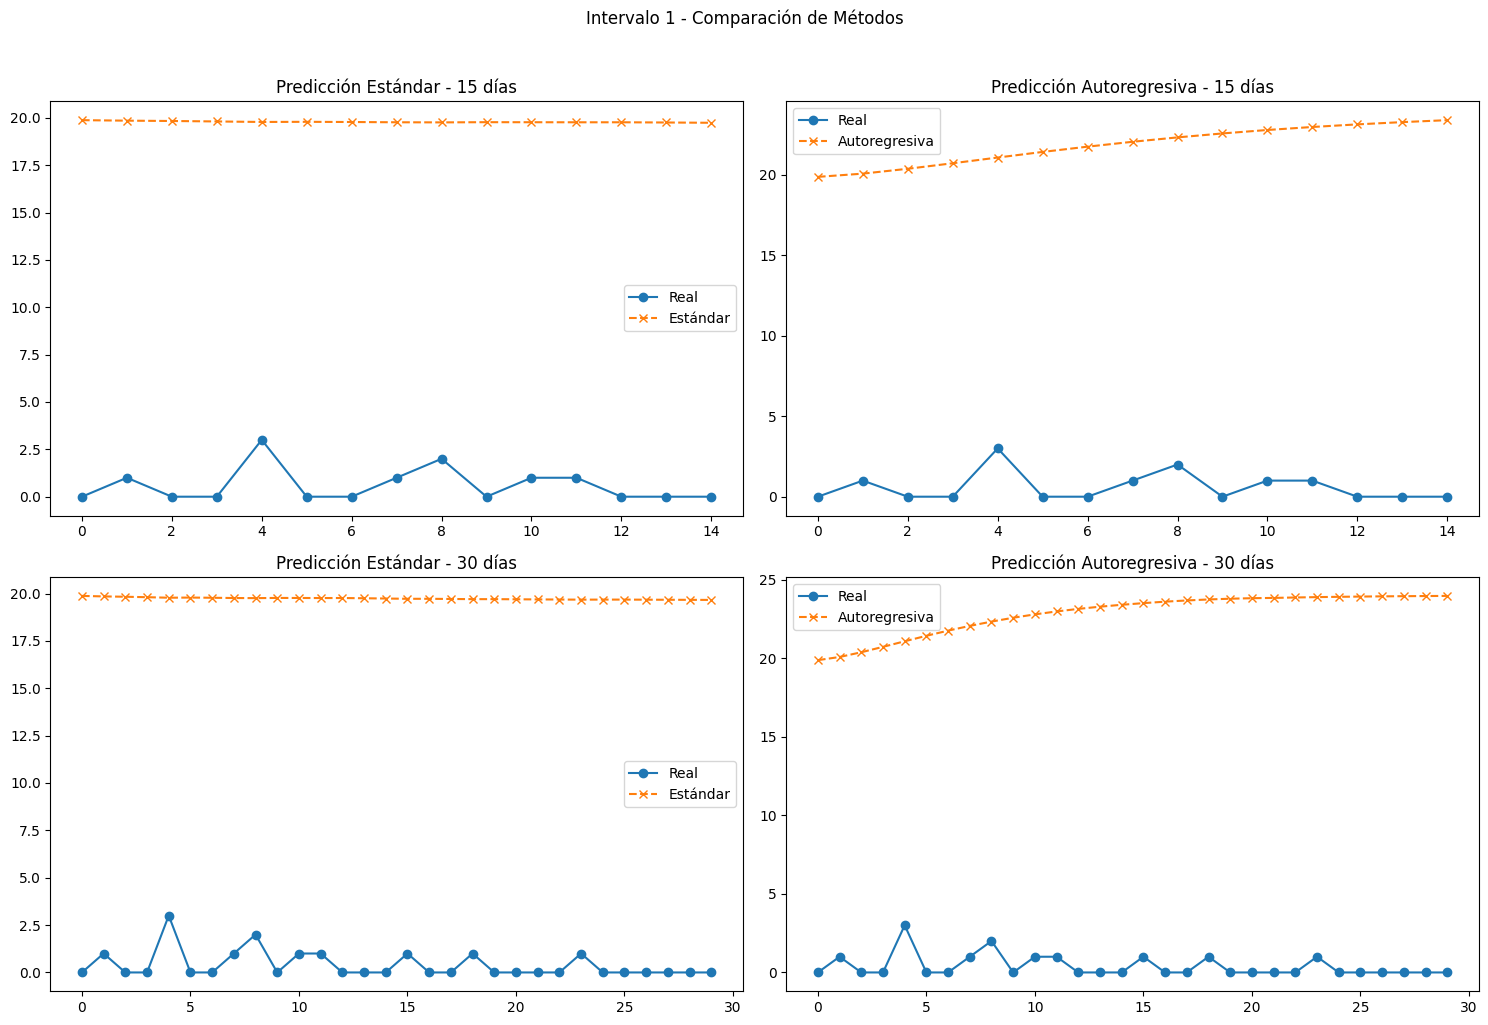


--------------------------------------------------
Entrenamiento excluyendo intervalo 2
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


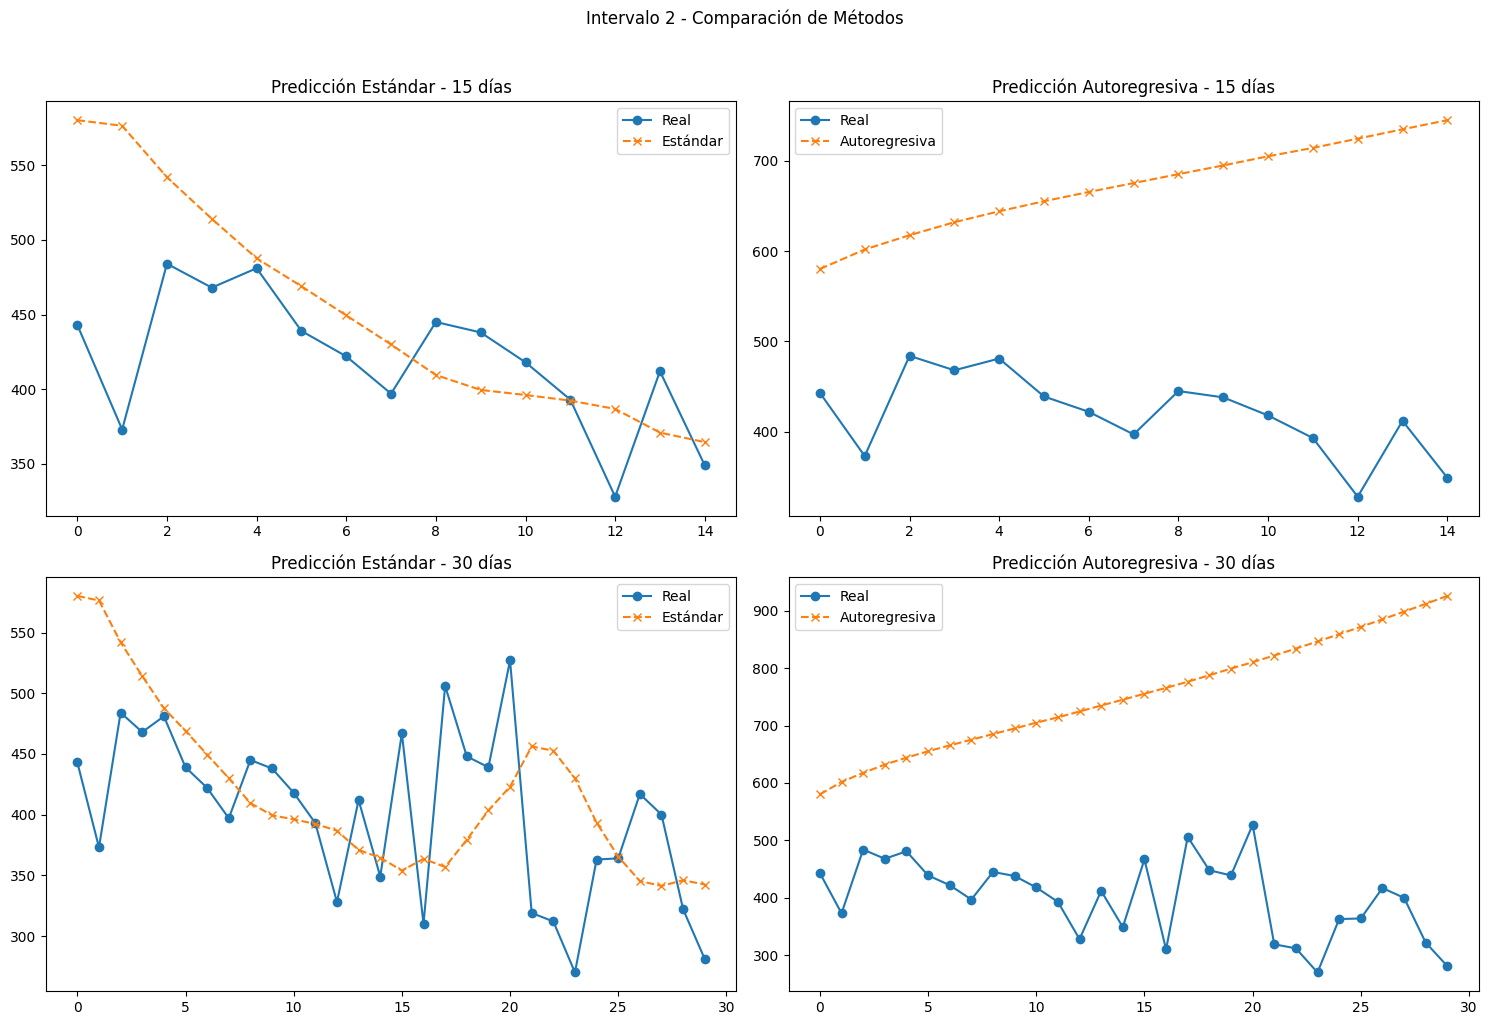


--------------------------------------------------
Entrenamiento excluyendo intervalo 3
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


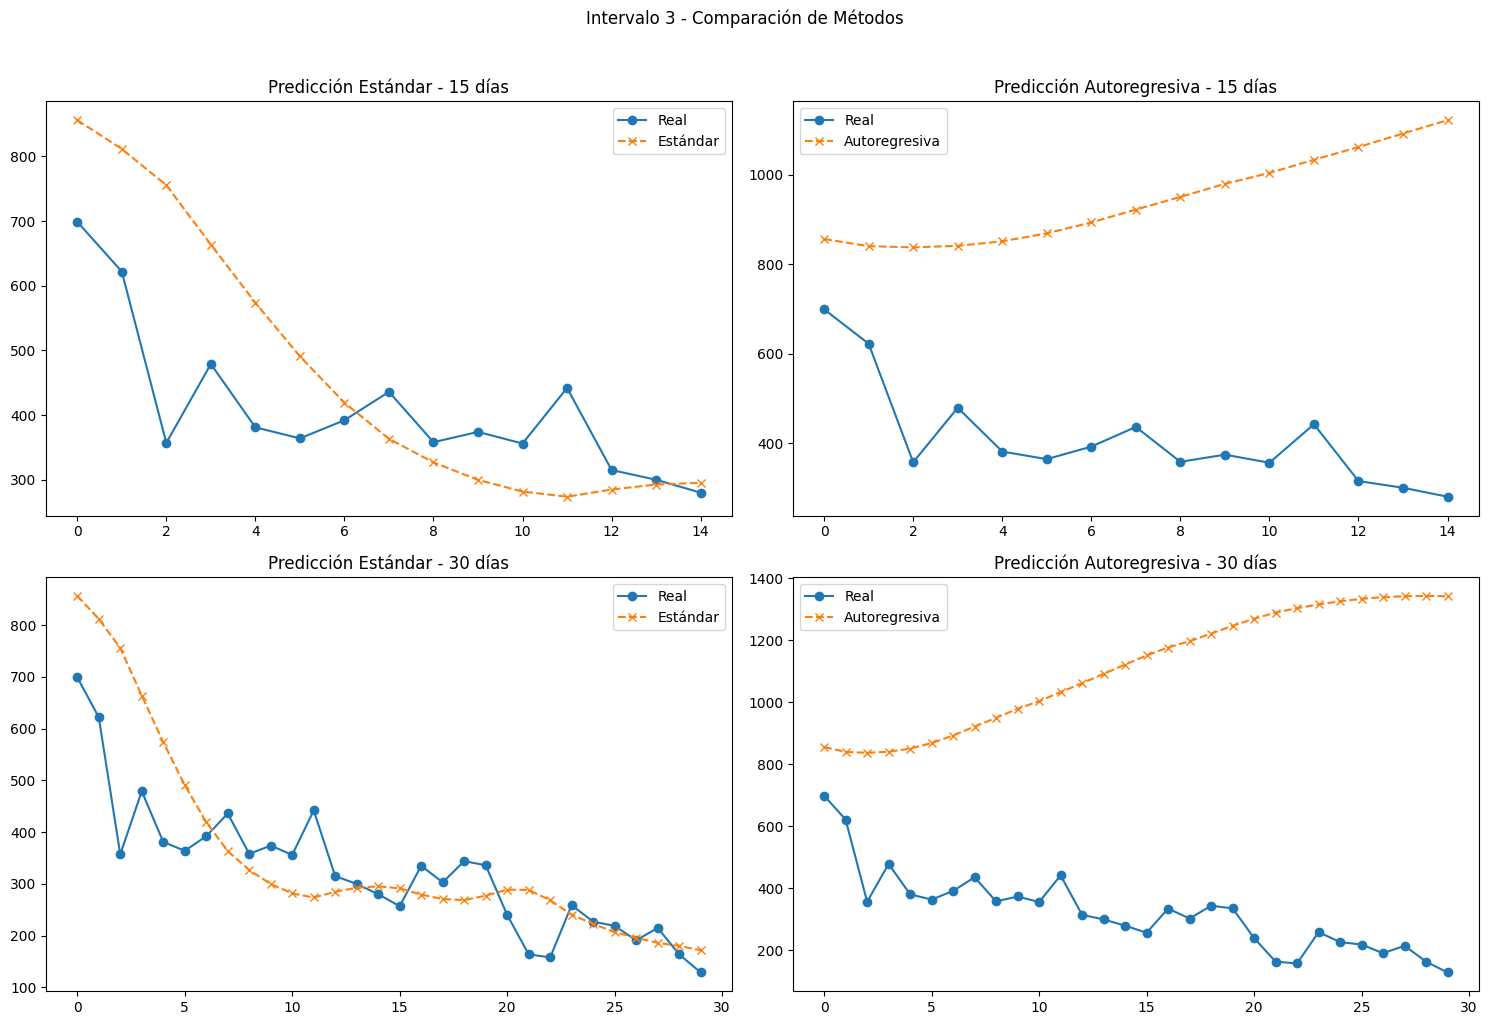


--------------------------------------------------
Entrenamiento excluyendo intervalo 4
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


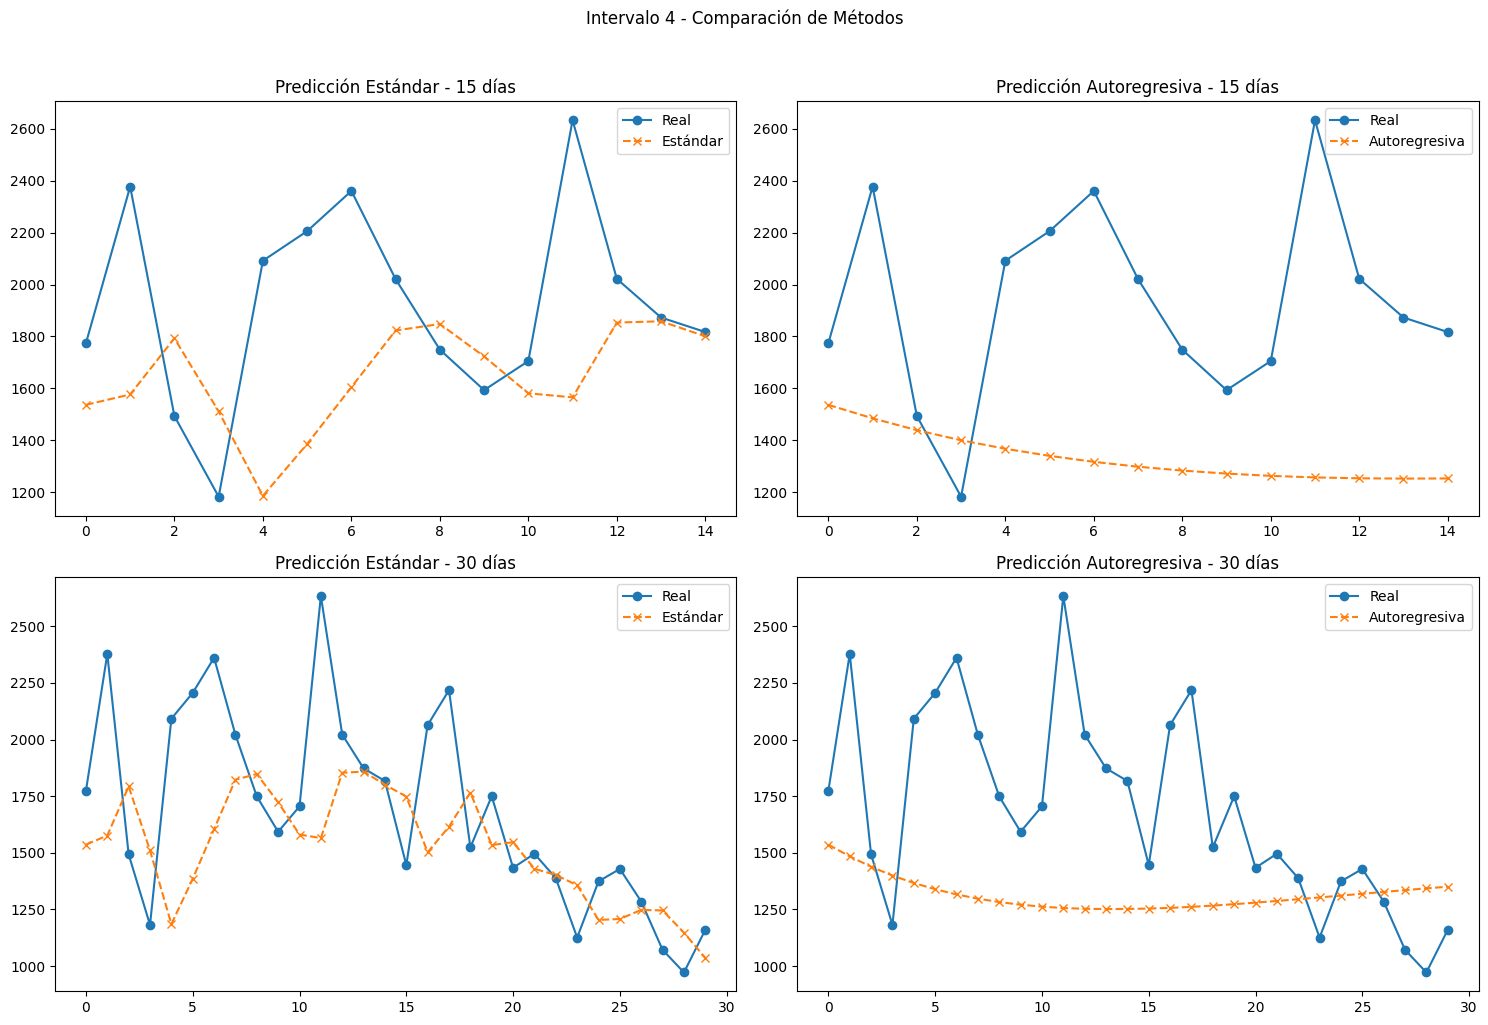


--------------------------------------------------
Entrenamiento excluyendo intervalo 5
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


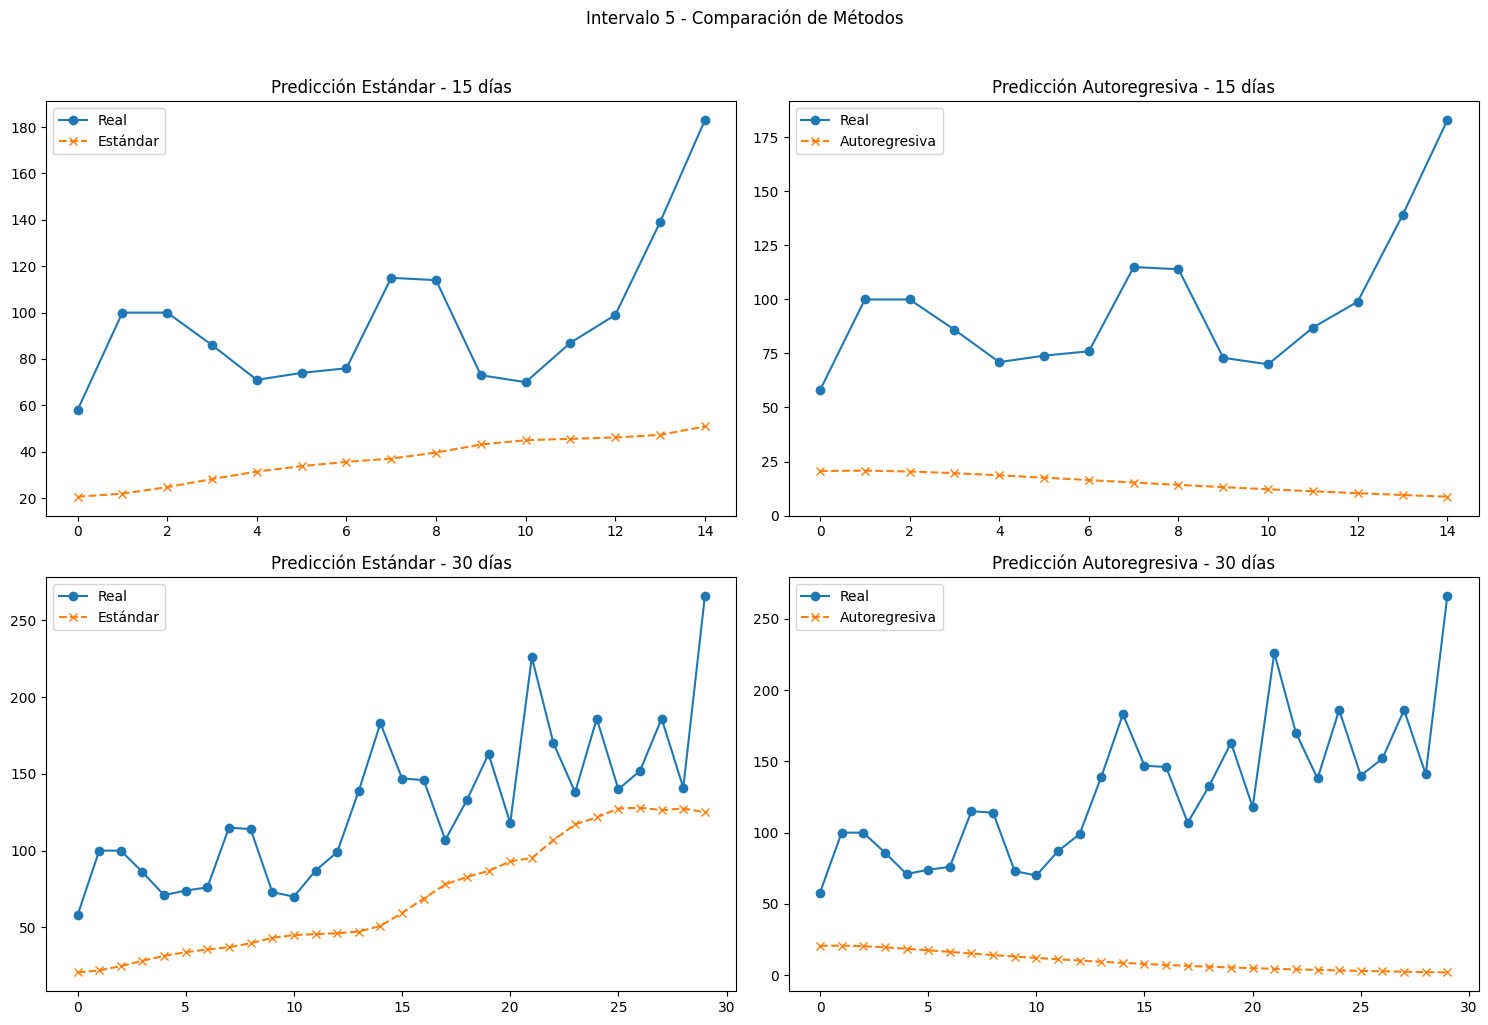


--------------------------------------------------
Entrenamiento excluyendo intervalo 6
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


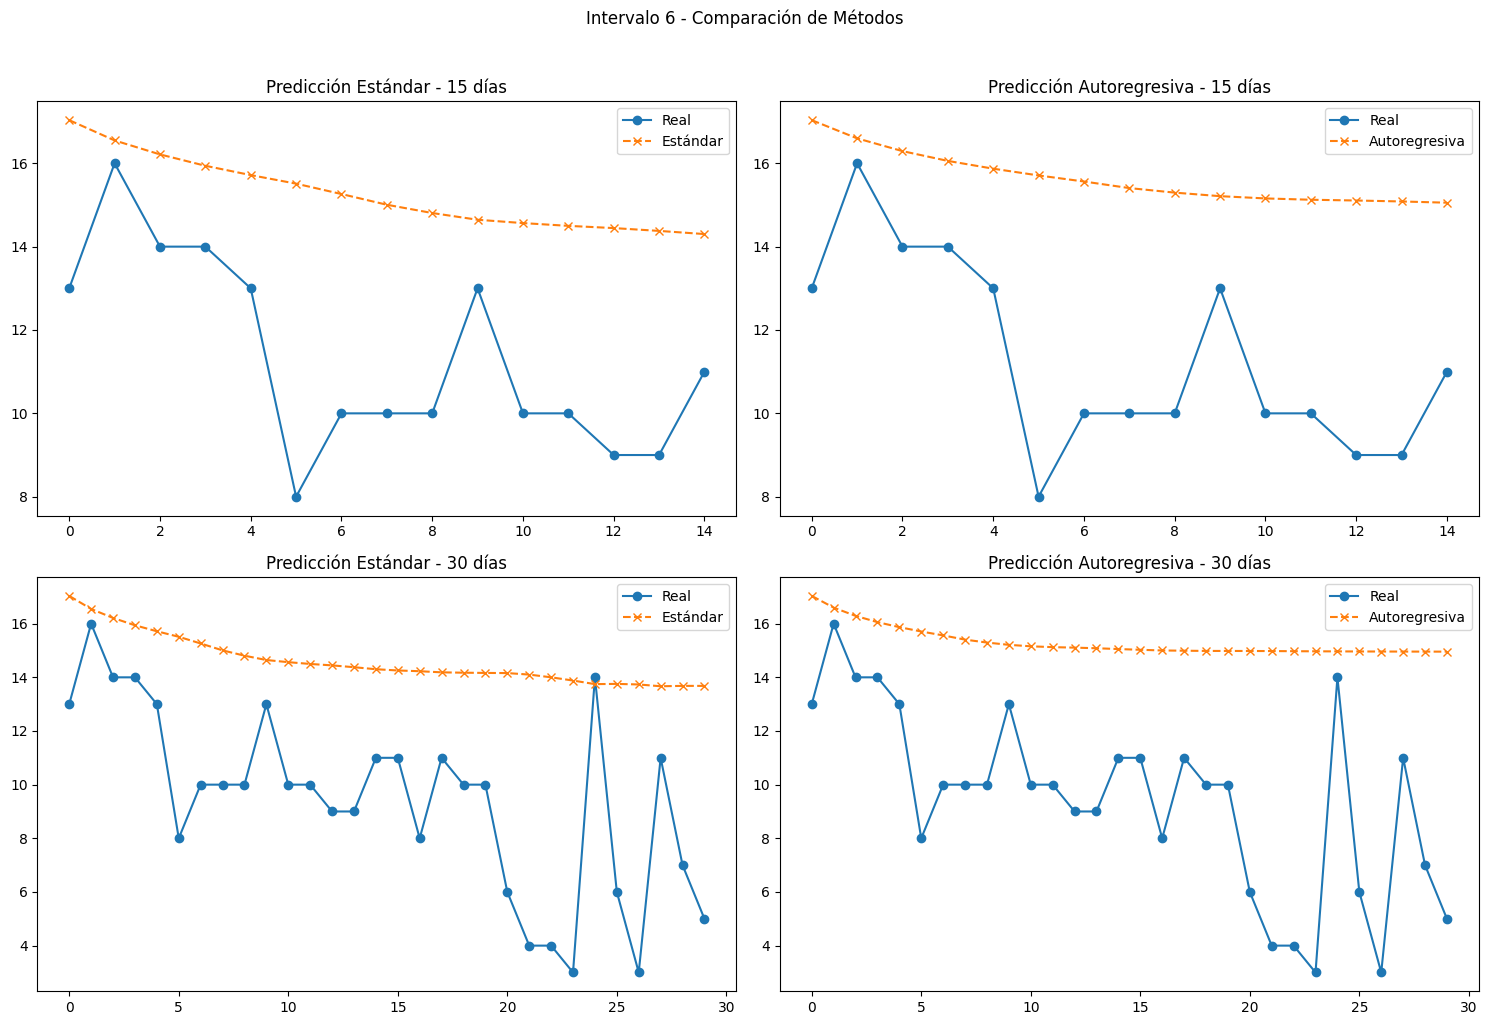


--------------------------------------------------
Entrenamiento excluyendo intervalo 7
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


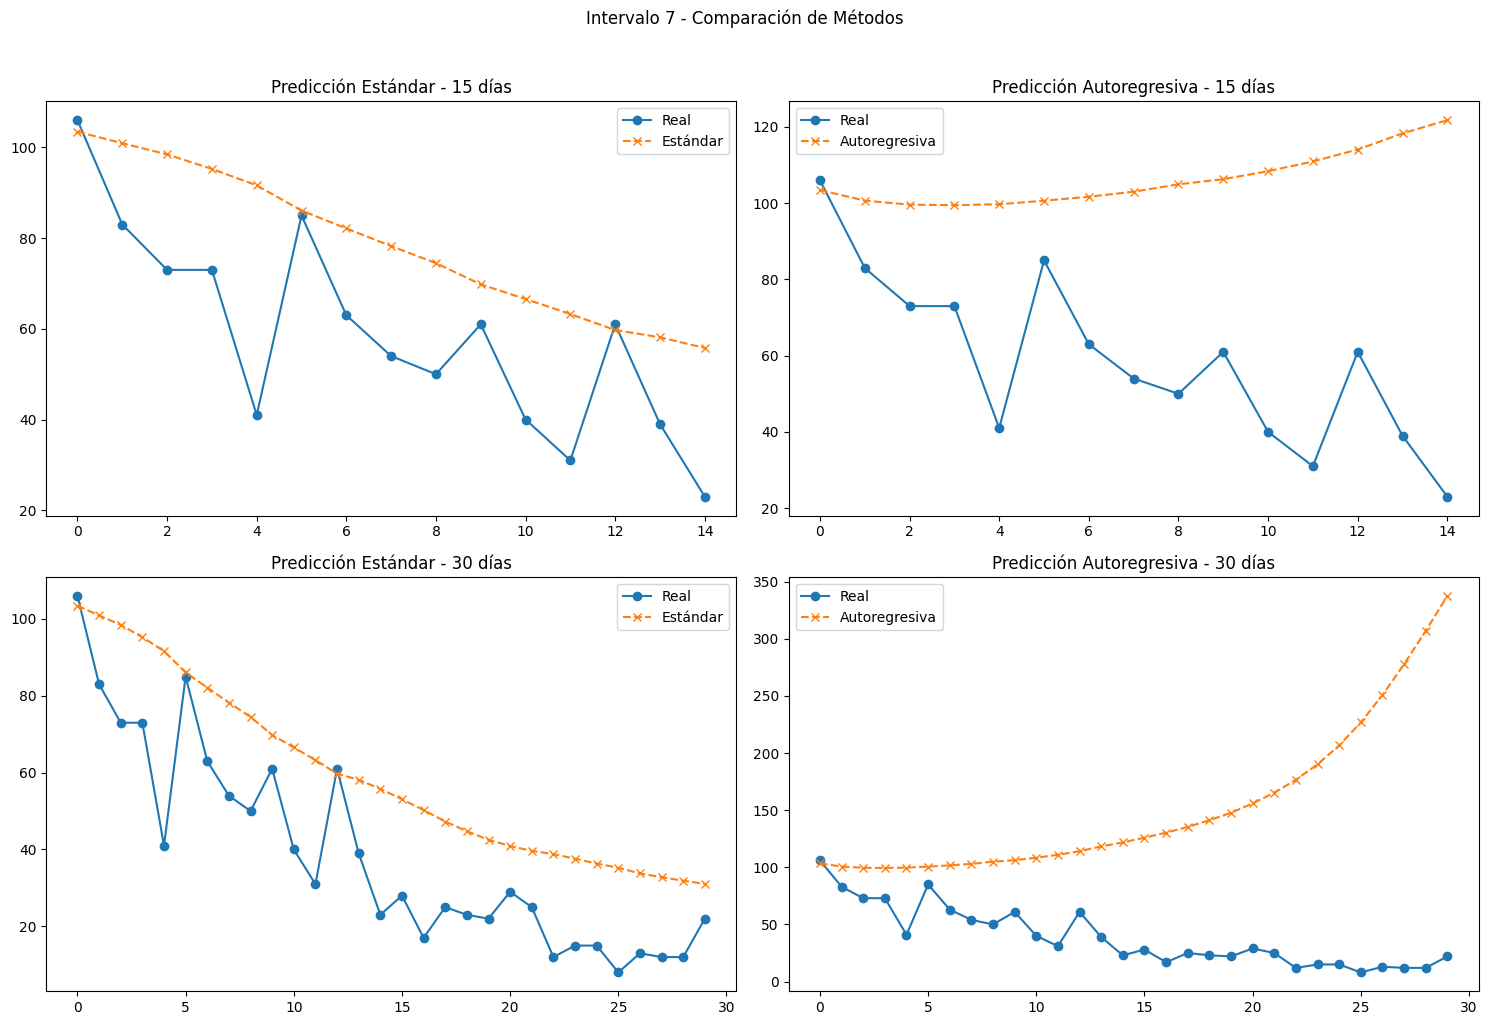


--------------------------------------------------
Entrenamiento excluyendo intervalo 8
--------------------------------------------------


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


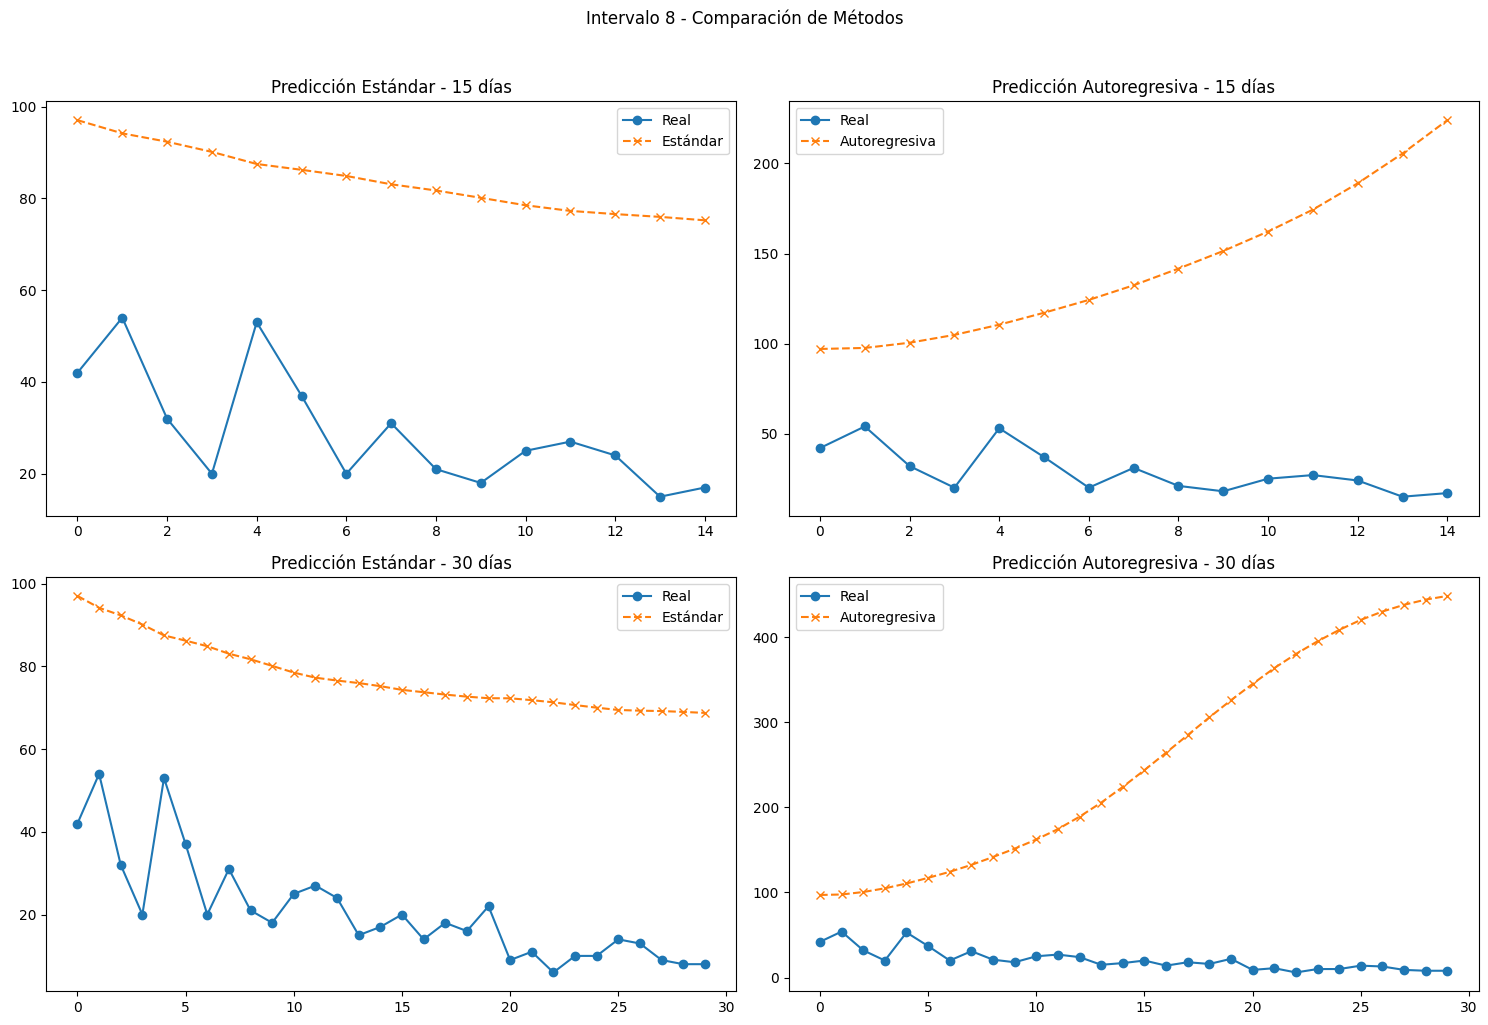


=== RESUMEN FINAL DE MÉTRICAS ===

Método: Estándar
  Horizonte 15 días:
    MAE:   90.4118
    MSE:   39796.6506
    SMAPE: 62.4674
  Horizonte 30 días:
    MAE:   76.8301
    MSE:   25817.3504
    SMAPE: 67.3040

Método: Autoregresivo
  Horizonte 15 días:
    MAE:   209.3494
    MSE:   114451.6857
    SMAPE: 89.4792
  Horizonte 30 días:
    MAE:   261.5596
    MSE:   161535.0464
    SMAPE: 109.5907


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# ====================== CONFIGURACIÓN GLOBAL ======================
WINDOW_SIZE = 21     # Tamaño de la ventana temporal (cambiable a 14, 30, etc.)
HORIZONTES = [15, 30]  # Pasos de predicción a evaluar
EPOCHS = 50          # Épocas de entrenamiento
BATCH_SIZE = 16      # Tamaño del batch
# ==================================================================

# Función para crear secuencias
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Función SMAPE
def smape(y_true, y_pred, eps=1e-8):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return 100 * np.mean(numerator / (denominator + eps))

# Función de predicción autoregresiva
def autoregressive_forecast(initial_sequence, steps, model, window_size):
    if len(initial_sequence) != window_size:
        raise ValueError(f"La secuencia inicial debe tener largo {window_size}")
    history = list(initial_sequence)
    preds = []
    for _ in range(steps):
        x_input = np.array(history[-window_size:]).reshape(1, window_size, 1)
        pred = model.predict(x_input, verbose=0)[0, 0]
        preds.append(pred)
        history.append(pred)
    return np.array(preds)

# Construcción del modelo LSTM (modular)
def build_lstm_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Inicialización de métricas usando diccionarios
metricas = {
    'std': {h: {'mae': [], 'mse': [], 'smape': []} for h in HORIZONTES},
    'auto': {h: {'mae': [], 'mse': [], 'smape': []} for h in HORIZONTES}
}

# Procesamiento de intervalos (asumiendo que df y intervalos_ordenados están definidos)
for test_interval in range(len(intervalos_ordenados)):
    print(f"\n{'-'*50}")
    print(f"Entrenamiento excluyendo intervalo {test_interval+1}")
    print(f"{'-'*50}")
    
    # 1. Separar datos de entrenamiento y prueba
    train_data = df[df['Intervalo'] != intervalos_ordenados[test_interval]]
    test_data = df[df['Intervalo'] == intervalos_ordenados[test_interval]]
    
    # Validar datos mínimos requeridos
    min_test_length = WINDOW_SIZE + max(HORIZONTES)
    if len(train_data) < WINDOW_SIZE or len(test_data) < min_test_length:
        print(f"Intervalo {test_interval+1} omitido: datos insuficientes")
        continue
    
    # 2. Normalización
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[['Frecuencia']])
    test_scaled = scaler.transform(test_data[['Frecuencia']])
    
    # 3. Crear secuencias de entrenamiento
    X_train, y_train = create_sequences(train_scaled, WINDOW_SIZE)
    X_train = X_train.reshape((X_train.shape[0], WINDOW_SIZE, 1))
    
    # 4. Entrenar modelo
    model = build_lstm_model(WINDOW_SIZE)
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # 5. Predicción estándar
    X_test, y_test = create_sequences(test_scaled, WINDOW_SIZE)
    if len(X_test) == 0:
        continue
    
    X_test = X_test.reshape((X_test.shape[0], WINDOW_SIZE, 1))
    y_pred_std = model.predict(X_test, verbose=0)
    y_pred_std = scaler.inverse_transform(y_pred_std)
    y_real_std = scaler.inverse_transform(test_scaled[WINDOW_SIZE:])
    
    # 6. Predicción autoregresiva
    initial_sequence = test_scaled[:WINDOW_SIZE, 0]
    max_horizon_auto = min(max(HORIZONTES), len(test_scaled) - WINDOW_SIZE)
    y_pred_auto = autoregressive_forecast(initial_sequence, max_horizon_auto, model, WINDOW_SIZE)
    y_pred_auto = scaler.inverse_transform(y_pred_auto.reshape(-1, 1))
    y_real_auto = scaler.inverse_transform(test_scaled[WINDOW_SIZE:WINDOW_SIZE + max_horizon_auto])
    
    # 7. Cálculo de métricas para cada horizonte
    for horizonte in HORIZONTES:
        # Predicción estándar
        n_steps_std = min(horizonte, len(y_pred_std))
        y_pred_std_trunc = y_pred_std[:n_steps_std]
        y_real_std_trunc = y_real_std[:n_steps_std]
        
        metricas['std'][horizonte]['mae'].append(mean_absolute_error(y_real_std_trunc, y_pred_std_trunc))
        metricas['std'][horizonte]['mse'].append(mean_squared_error(y_real_std_trunc, y_pred_std_trunc))
        metricas['std'][horizonte]['smape'].append(smape(y_real_std_trunc, y_pred_std_trunc))
        
        # Predicción autoregresiva
        n_steps_auto = min(horizonte, len(y_pred_auto))
        y_pred_auto_trunc = y_pred_auto[:n_steps_auto]
        y_real_auto_trunc = y_real_auto[:n_steps_auto]
        
        metricas['auto'][horizonte]['mae'].append(mean_absolute_error(y_real_auto_trunc, y_pred_auto_trunc))
        metricas['auto'][horizonte]['mse'].append(mean_squared_error(y_real_auto_trunc, y_pred_auto_trunc))
        metricas['auto'][horizonte]['smape'].append(smape(y_real_auto_trunc, y_pred_auto_trunc))
    
    # 8. Visualización dinámica por horizontes
    fig, axs = plt.subplots(len(HORIZONTES), 2, figsize=(15, 5*len(HORIZONTES)))
    plt.suptitle(f'Intervalo {test_interval+1} - Comparación de Métodos', y=1.02)
    
    for idx, horizonte in enumerate(HORIZONTES):
        # Predicción estándar
        axs[idx, 0].plot(y_real_std[:horizonte], label='Real', marker='o')
        axs[idx, 0].plot(y_pred_std[:horizonte], label='Estándar', linestyle='--', marker='x')
        axs[idx, 0].set_title(f'Predicción Estándar - {horizonte} días')
        axs[idx, 0].legend()
        
        # Predicción autoregresiva
        axs[idx, 1].plot(y_real_auto[:horizonte], label='Real', marker='o')
        axs[idx, 1].plot(y_pred_auto[:horizonte], label='Autoregresiva', linestyle='--', marker='x')
        axs[idx, 1].set_title(f'Predicción Autoregresiva - {horizonte} días')
        axs[idx, 1].legend()
    
    plt.tight_layout()
    plt.show()

# 9. Reporte final de métricas
print("\n=== RESUMEN FINAL DE MÉTRICAS ===")
for metodo in ['std', 'auto']:
    print(f"\nMétodo: {'Estándar' if metodo == 'std' else 'Autoregresivo'}")
    for horizonte in HORIZONTES:
        print(f"  Horizonte {horizonte} días:")
        print(f"    MAE:   {np.mean(metricas[metodo][horizonte]['mae']):.4f}")
        print(f"    MSE:   {np.mean(metricas[metodo][horizonte]['mse']):.4f}")
        print(f"    SMAPE: {np.mean(metricas[metodo][horizonte]['smape']):.4f}")